# Graded Challenge 6

## 1. Introduction

**Nama**: Iqbal Saputra

**Batch**: RMT-032

**Objective**: Notebook ini dibuat untuk membuat model Clustering untuk membuat Customer Segmentation terhadap data penggunaan kartu kredit dalam 6 bulan terakhir.


## 2. Query SQL

```sql
select *
from `ftds-hacktiv8-project.phase1_ftds_032_rmt.credit-card-information`
where MOD(cust_id, 2) = 0
```

## 3. Libraries


In [1]:
# Import Library
# Library Dataframe
import pandas as pd

# Library Numerical Data
import numpy as np

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Statistics
from scipy import stats
from scipy.stats import pearsonr, kendalltau, spearmanr, uniform

# Library Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

# Libraries for Modeling ML
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score,KFold, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, roc_auc_score,mean_squared_error, root_mean_squared_error, r2_score, accuracy_score , classification_report , confusion_matrix,precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from feature_engine.outliers import Winsorizer
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import uniform, randint
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.tree import DecisionTreeClassifier
# lib pipelines
from sklearn.pipeline import Pipeline

# Model Saving
import pickle
import json
import joblib

## 4. Data Loading


### Column Description


| Feature                          | Description                                                                                   |
| ---------------------------------|-----------------------------------------------------------------------------------------------|
| CUST_ID                          | Identification of Credit Card holder                                                          |
| BALANCE                          | Balance amount left in their account                                                           |
| BALANCE_FREQUENCY                | How frequently balance is updated (1=frequently updated, 0=not frequently updated)            |
| PURCHASES                        | Amount of purchases made from account                                                         |
| ONEOFF_PURCHASES                 | Maximum purchase amount done in one-go                                                        |
| INSTALLMENTS_PURCHASES           | Amount of purchase done in installment                                                        |
| CASH_ADVANCE                     | Cash in advance given by user                	                                               |
| PURCHASES_FREQUENCY              | How frequently purchase are being made (1=frequently updated, 0=not frequently updated)       |
| ONEOFF_PURCHASES_FREQUENCY       | How frequently purchase are happening in one-go (scale same as above)                   |
| PURCHASES_INSTALLMENTS_FREQUENCY | How frequently purchase with installments are being done (scale same as above)                |
| CASH_ADVANCE_FREQUENCY           | How frequently the cash in advance being paid                                                 |
| CASH_ADVANCE_TRX                 | Number of transactions made with 'Cash in Advance'     	                                   |
| PURCHASES_TRX                    | Number of purchase transactions made	                                                       |
| CREDIT_LIMIT                     | Limit of credit card for user                                                                 |
| PAYMENTS                         | Amount of payment done by user	                                                               |
| MINIMUM_PAYMENTS                 | Minimum amount of payments made by user	                                                   |
| PRC_FULL_PAYMENT                 | Percent of full payment made by user	                                                       |
| TENURE                           | Tenure of credit card service for user                                                        |


**penjelasan** :

dari deskripsi kolom, kita dapat melihat bahwa data memiliki beberapa **kolom kategorikal** dan **kolom numerik**

In [2]:
# Make new dataset
df = pd.read_csv('P1G6_Set_1_iqbal_saputra.csv')
# Show first 10 data
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125     200.00              0.00   
1     1902   943.584041              0.875     103.00            103.00   
2     2322     1.979916              0.125      80.00             80.00   
3     3091     3.833185              0.125      45.00             45.00   
4     3426   461.455720              1.000     585.00            585.00   
5     3976  1053.594730              1.000    1450.00           1450.00   
6     4266  2237.238086              1.000     120.00            120.00   
7     4360  2730.843802              1.000    2900.00           2900.00   
8     4680   424.994385              0.375    1200.00           1200.00   
9     5069     0.000000              0.000     176.03            176.03   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1         500.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        1500.0   
6                     0.0                 0              1        2500.0   
7                     0.0                 0              1        2900.0   
8                     0.0                 0              1        1200.0   
9                     0.0                 0              1        7000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3    0.000000               NaN               0.0       8  
4  258.032630        151.696433               0.0       8  
5  397.090516        227.143184               0.0       8  
6  343.102984        712.986387               0.0       8  
7    0.000000               NaN               0.0       8  
8   57.266292         56.720210               0.0       8  
9    0.000000               NaN               0.0       8

**penjelasan** :

menampilkan 10 data pertama

In [3]:
# Show last 10 data
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8940     2345  9629.808851           1.000000       0.00              0.00   
8941     4630  1079.008102           1.000000       0.00              0.00   
8942     6785  1040.030221           1.000000       0.00              0.00   
8943     7347  1322.818587           1.000000       0.00              0.00   
8944     8447  1060.391273           1.000000       0.00              0.00   
8945     8614   809.582978           0.909091       0.00              0.00   
8946     4296  3386.490883           1.000000     560.98            427.22   
8947     1995  3447.674222           1.000000     205.00            205.00   
8948     4476  4840.545574           1.000000    1595.93           1595.93   
8949     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8940                    0.00   4372.393835             0.000000   
8941                    0.00   1259.571764             0.000000   
8942                    0.00   1390.648290             0.000000   
8943                    0.00    762.301096             0.000000   
8944                    0.00   1475.858013             0.000000   
8945                    0.00   3819.672466             0.000000   
8946                  133.76   2008.153534             1.000000   
8947                    0.00   4548.057776             0.090909   
8948                    0.00   4359.325750             0.454545   
8949                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8940                    0.000000                          0.000000   
8941                    0.000000                          0.000000   
8942                    0.000000                          0.000000   
8943                    0.000000                          0.000000   
8944                    0.000000                          0.000000   
8945                    0.000000                          0.000000   
8946                    0.727273                          0.363636   
8947                    0.090909                          0.000000   
8948                    0.454545                          0.000000   
8949                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8940                0.545455                 9              0       12000.0   
8941                0.545455                 9              0        1200.0   
8942                0.545455                18              0        1400.0   
8943                0.545455                11              0        1500.0   
8944                0.545455                10              0        2000.0   
8945                0.545455                 7              0        4150.0   
8946                0.545455                 9             20       10100.0   
8947                0.545455                 7              1       10500.0   
8948                0.545455                17             25        6000.0   
8949                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8940  2468.988022       2134.295731          0.000000      11  
8941  1379.635287        271.364415          0.090909      11  
8942   290.129620        287.994171          0.000000      11  
8943  1035.627320        312.835530          0.000000      11  
8944   407.360560        277.084736          0.000000      11  
8945  4372.148648        241.645387          0.090909      11  
8946  1039.000037        886.050237          0.000000      11  
8947   665.239171        817.844662          0.000000      11  
8948   905.844846       2376.919568          0.090909      11  
8949  3056.424974        910.707525          0.090909      11

**penjelasan** :

menampilkan 10 data terakhir

In [4]:
# Duplicate Dataset
new_data = df.copy()

**penjelasan** :

membuat salinan dataset untuk memastikan data asli aman dan tidak berubah

In [5]:
# Show dataset info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**penjelasan** :

dari info dataset tersebut kita dapat melihat bahwa :
* ada entri `8950 ` dalam kumpulan data
* data menunjukkan **nilai nol** di kolom `MINIMUM_PAYMENTS`
* semua kolom adalah data numerik, dengan tipe data **integer** dan **float**

## 5. Exploratory Data Analysis


In [6]:
# Describe dataset
new_data.describe().T

count         mean          std        min  \
CUST_ID                           8950.0  4475.500000  2583.786788   1.000000   
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
CUST_ID                           2238.250000  4475.500000  6712.750000   
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
CUST_ID                            8950.00000  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

**penjelasan** :

dari uraian dataset tersebut kita dapat melihat bahwa :  
* kolom `TENURE` mungkin memiliki varian yang rendah, karena dari **25% hingga maksimal** menunjukkan **angka yang sama**, hal ini mungkin memengaruhi IQR-nya dan **mungkin tidak dapat dibatasi** menggunakan IQR metode jika data memiliki outlier

## Distribusi data pada kolom `TENURE`
Melihat jumlah tiap value pada kolom tenure

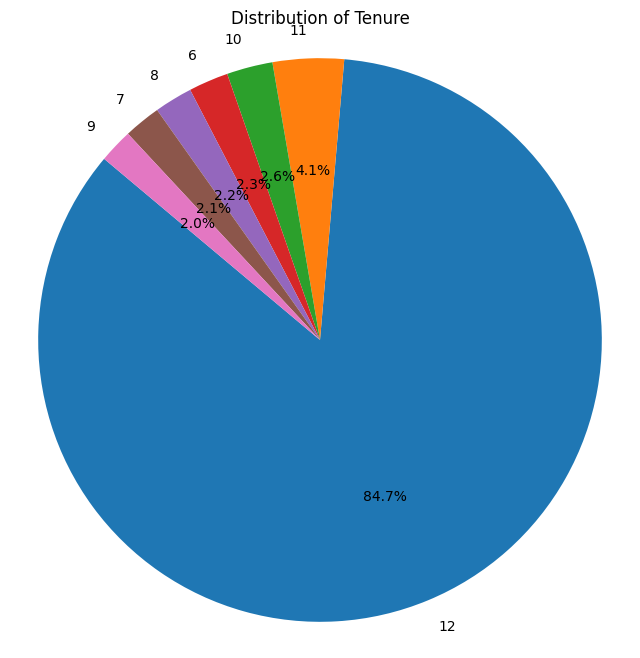

In [7]:
# Count the frequency of each unique value in the 'TENURE' column
tenure_counts = new_data['TENURE'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tenure')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

**penjelasan**  
* Dari pie plot diketahui bahwa data terbanyak merupakan pengguna kredit dengan masa penggunaan 12 bulan yaitu sebanyak 84.7%. Dengan pengguna kredit paling sedikit pada data adalah pengguna dengan masa kredit 9 bulan dengan jumlah 1.9% dari seluruh data

In [8]:
# Count duplicated data
new_data.duplicated().sum()

0

**penjelasan** :

**tidak ada data duplikat**

Dari `deskripsi kolom` dan `info data`, kita dapat melihat bahwa **ada beberapa data kategorikal dengan tipe data numerik**, jadi kita akan memisahkan kolom kategorikal dan numerik dari data secara manual.

In [9]:
# Splitting between numerical and categorical columns
cat_columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'
]
num_columns = [col for col in new_data.columns if col not in cat_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
Numcerical Columns:  ['CUST_ID', 'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


**penjelasan** :

Setelah memisahkan kumpulan data, sekarang kita dapat melanjutkan untuk menyelidiki apakah data numerik memiliki outlier

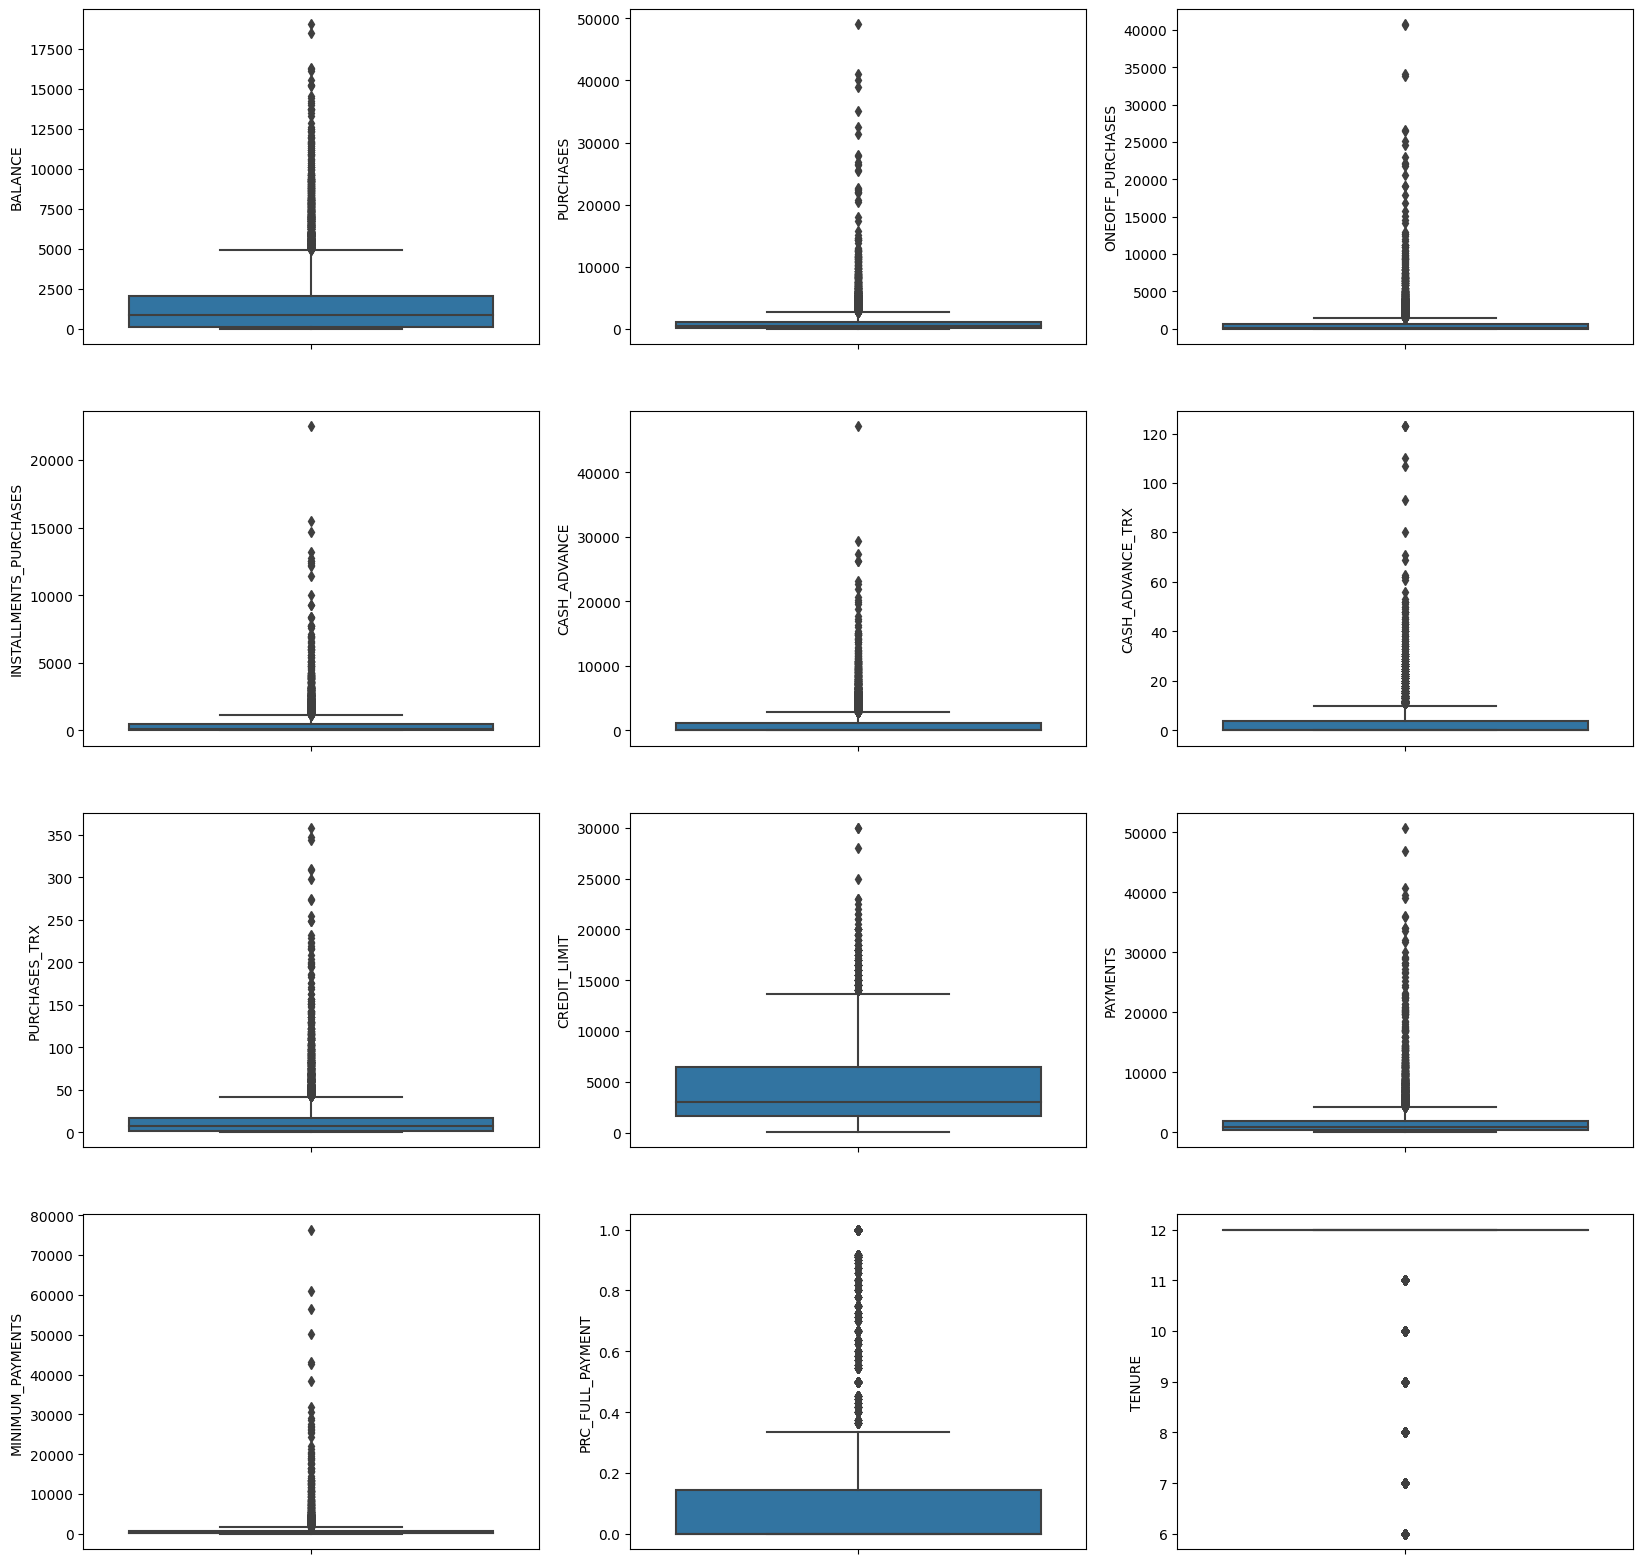

In [10]:
# Check the outliers of numerical data
fig = plt.figure(figsize=(20, 20))
cols = num_columns
num_rows = 4
num_cols = 3

for index in range(1, num_rows*num_cols+1):
    fig.add_subplot(num_rows, num_cols, index)
    sns.boxplot(data=new_data, y=cols[index])
plt.show()

**penjelasan** :  

dari kolom numerik kita dapat melihat bahwa :  

* data menunjukkan **banyak outlier** yang perlu ditangani
* Kolom `MINIMUM_PAYMENTS` dan `TENURE` menunjukkan **variasi rendah**, terlihat dari tampilan iqr yang tipis

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

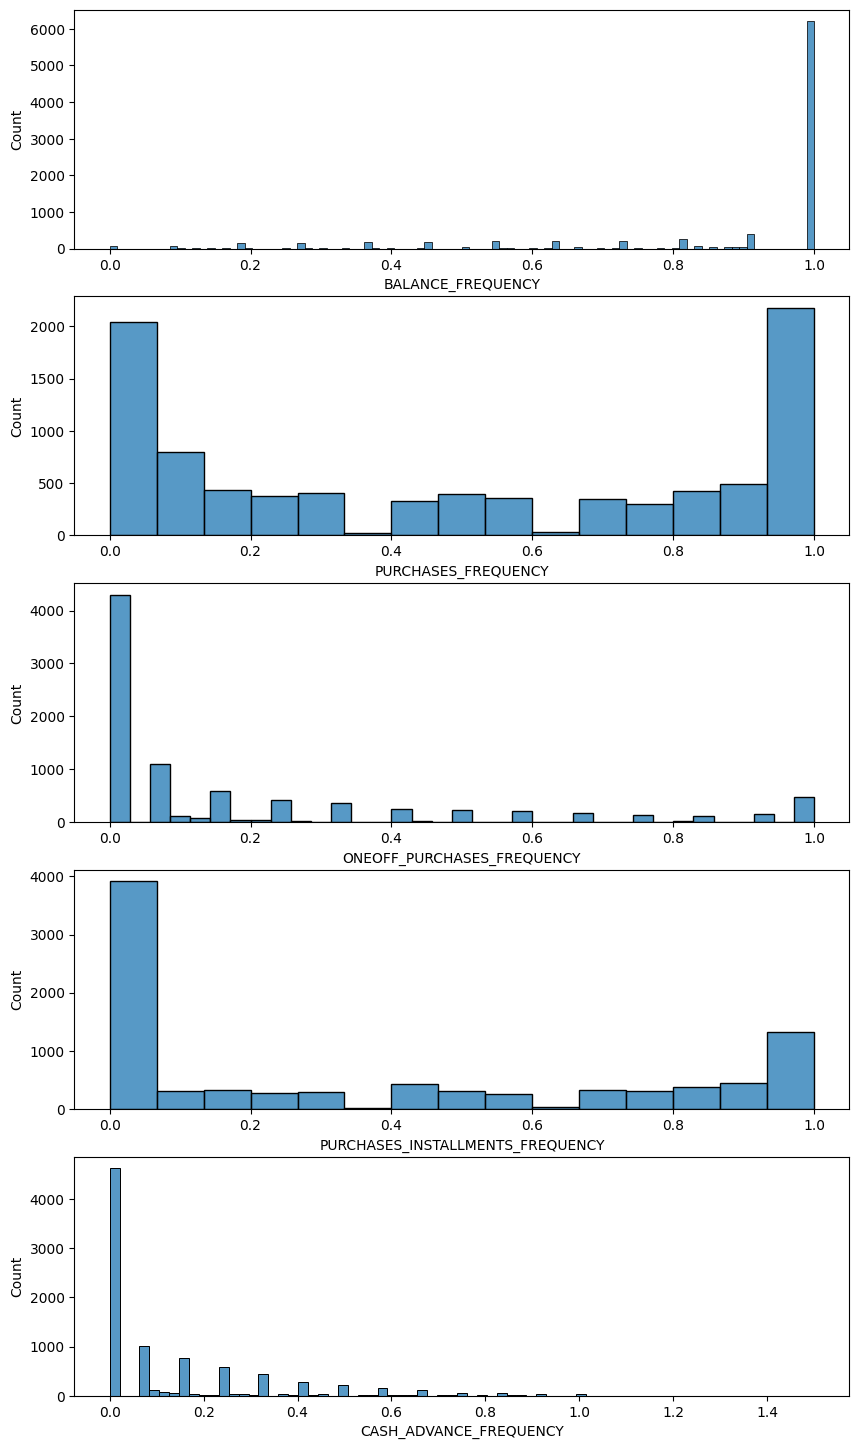

In [11]:
# Check the histogram of the categorical data
fig = plt.figure(figsize=(10, 18))
cols = cat_columns
num_rows = 5
num_cols = 1

for index in range(1, num_rows*num_cols + 1):
    fig.add_subplot(num_rows, num_cols, index)
    sns.histplot(data=new_data, x=cols[index-1])
plt.show()

**penjelasan** :

dari kolom kategorikal, kita dapat melihat bahwa:  
* Kolom `BALANCE_FREQUENCY` menunjukkan bahwa **sebagian besar pengguna sering memperbarui saldo mereka** daripada tidak
* Kolom `PURCHASES_FREQUENCY` menunjukkan **tidak banyak perbedaan antara pengguna yang sering membeli dan tidak** sering membeli
* Kolom `ONE_OFF_PURCHASES` menunjukkan bahwa **sebagian besar pengguna tidak sering melakukan pembelian sekaligus**
* Kolom `PURCHASES_INSTALLMENT_FREQUENCY` menunjukkan bahwa **sebagian besar pengguna tidak sering membeli dengan cicilan**
* Kolom `CASH_ADVANCE_FREQUENCY` menunjukkan bahwa **sebagian besar pengguna tidak sering membayar dengan uang tunai di muka**

## Korelasi antar fitur pada data
Datarame penggunaan kartu kredit ini memiliki banyak fitur didalamnya. Untuk megetahui apakah pada fitur - fitur ini terdapat relasi didalamnya, pengujian korelasi menggunakan heatmap dan scatter plot akan dilakukan

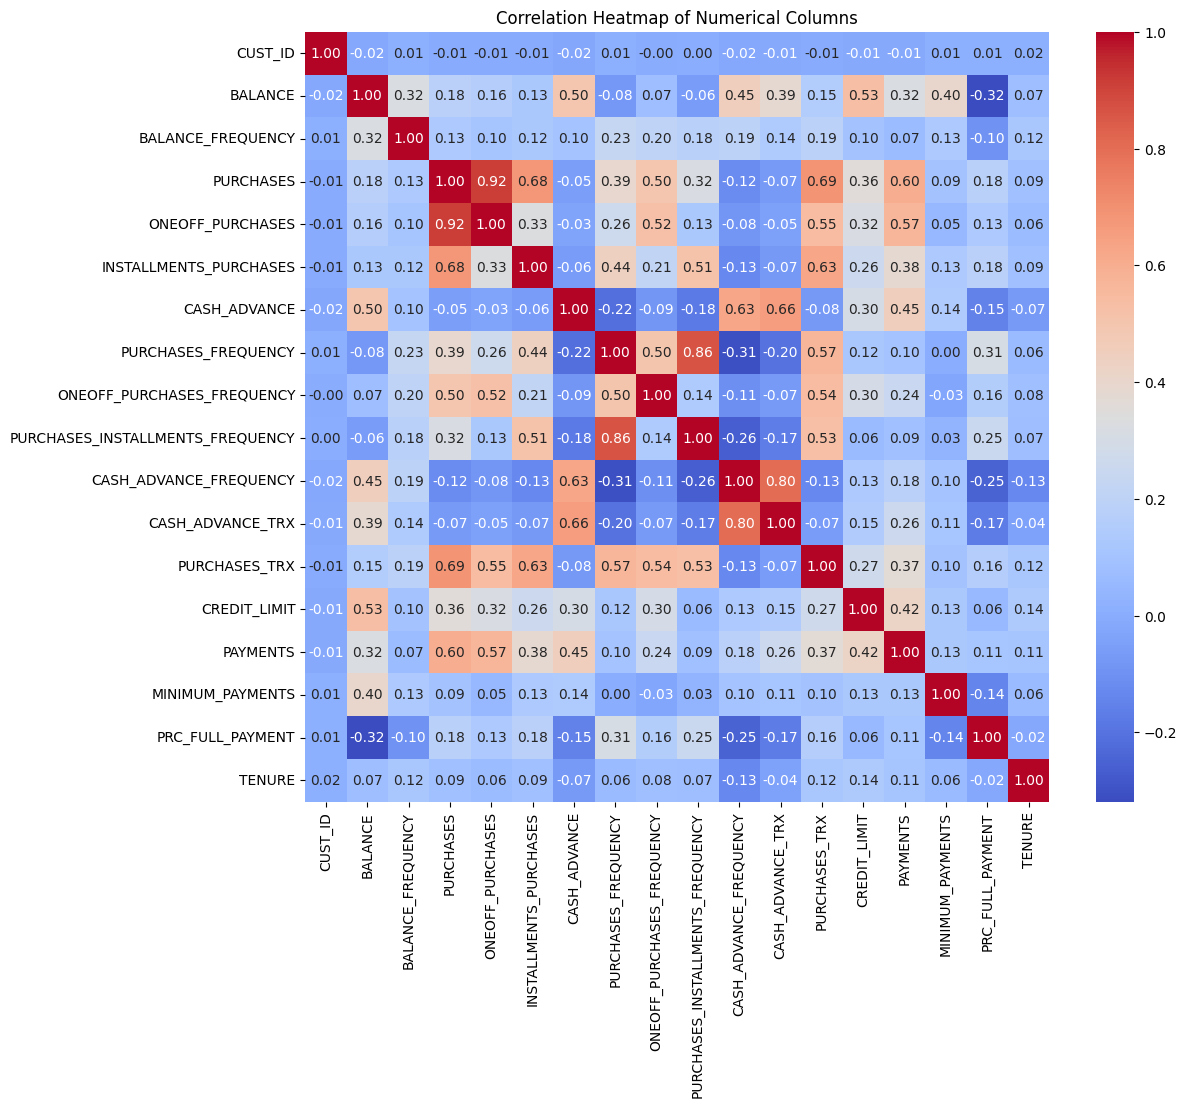

In [12]:
correlation_matrix = new_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap of Numerical Columns')

# Show plot
plt.show()

Berdasarkan heatmap didapatkan beberapa hal tersebut :
* `Cust_id` merupakan kolom identifikasi yang dapat dihapuskan. karena dari nilai korelasinya kolom ini tidak memiliki hubungan dengan seluruh kolom lainnya
* `ONEOFF_PURCHASE_FREQUENCY` memiliki hubungan yang sengat kuat dengan `PURCHASES`. Berdasarkan dari penjelasan kolom sendiri, hal ini terjadi karena kedua kolom ini berhubungan langdung dengan data pembelian barang menggunakan kartu kredit
* `PURCHASES_INSTALLMENTS_FREQUENCY` memiliki hubungan yang kuat dengan `PUERCHASES_FREQUENCY`. Hal ini terjadi karena berdasarkan keterangan kolom, `PURCHASES_INSTALLMENTS_FREQUENCY` merupakan nilai `PUERCHASES_FREQUENCY` yang sudah disaring berdasarkan pembelian yang diikuti dengan pemasangan
* Secara keseluruhan semua kolom yang mengandung `PURCHASES` memiliki relasi dengan kolom `PURCHASES` lainnya dengan rata-rata nilai korelasi berkisar dari  0.50 - 0.70
* Secara keseluruhan semua kolom yang mengandung `FREQUENCY` memiliki relasi dengan kolom `FREQUENCY` lainnya dengan rata-rata nilai korelasi berkisar dari  0.53 - 0.56
* Secara keseluruhan semua kolom yang mengandung `CASH` memiliki relasi dengan kolom `CASH` lainnya dengan rata-rata nilai korelasi berkisar dari  0.66 - 0.68

## 6. Feature Engineering


### Handling Cardinality

In [13]:
# Check dataset info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**penjelasan** :  

Karena data **tidak memiliki kolom tipe data objek**, maka **tidak ada Kardinalitas yang harus ditangani**

### Handling Missing Value

In [14]:
# Check null in dataset
new_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**penjelasan** :  

Kita dapat melihat bahwa ada beberapa nilai null dalam data, karena `nilai null lebih rendah dari 5%` data, kita dapat mengatakan bahwa **aman untuk menghilangkan nilai null**

In [15]:
# Drop the null values in dataset
new_data.dropna(inplace=True)

# Check missing value in data after dropping
new_data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**penjelasan** :  

Setelah menangani nilai yang hilang, kita dapat melihat bahwa **tidak ada lagi nilai yang hilang** dalam data. Sekarang kita bisa beralih ke penanganan outlier

### Handling Outliers

Untuk memudahkan penanganannya, kita akan membuat fungsi untuk membagi setiap kolom menjadi `kolom terdistribusi normal`, dan `kolom terdistribusi miring` dengan penjelasan lebih lanjut apakah kolom tersebut memiliki **kemiringan rendah atau tinggi**

In [16]:
# Making data and columns for normal distribution
data_normal = []
column_normal = []

# Making data and columns for skewed distribution
data_skewed = []
column_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for num in num_columns:
    skewness = new_data[num].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    # Elif the data has low skewness
    elif skewness < -0.5 and skewness > -1: 
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Elif the data has low skewness
    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Elif the data has high skewness
    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

In [17]:
# Showing normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

normal_distribution  skewness
0             CUST_ID -0.000583

**penjelasan** :  

tabel di atas menunjukkan bahwa `CUST_ID` adalah satu-satunya kolom dengan **distribusi normal**

In [18]:
# Showing skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

skewed_distribution   skewness  rate
0                  BALANCE   2.374254  high
1                PURCHASES   8.055789  high
2         ONEOFF_PURCHASES   9.935776  high
3   INSTALLMENTS_PURCHASES   7.216133  high
4             CASH_ADVANCE   5.139629  high
5         CASH_ADVANCE_TRX   5.673327  high
6            PURCHASES_TRX   4.578418  high
7             CREDIT_LIMIT   1.507019  high
8                 PAYMENTS   5.873049  high
9         MINIMUM_PAYMENTS  13.622193  high
10        PRC_FULL_PAYMENT   1.886027  high
11                  TENURE  -3.011141  high

**penjelasan** :

tabel di atas menunjukkan bahwa **sebagian besar kolom memiliki kemiringan yang tinggi**

Seperti disebutkan sebelumnya di `EDA`, kolom `TENURE` memiliki variasi rendah yang menyebabkan kesalahan saat menggunakan **Metode IQR Winsorizer**. Jadi kita akan memindahkan kolom `TENURE` ke kolom **terdistribusi normal** untuk dibatasi menggunakan **Metode Winsorizer Gaussian**

In [19]:
# List low variation column
low_variation_column = ['TENURE']
# Drop column with low variation in skewed column and append it into normal column
for col in low_variation_column:
    column_skewed.remove(col)
    column_normal.append(col)

In [20]:
# Capping Method for Normal Distribution  
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=column_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
new_data_capped = winsorizer_normal.fit_transform(new_data)

**penjelasan** :

membatasi **kolom terdistribusi normal** dan **kolom varians rendah**

In [21]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=column_skewed)

# Fit & Transforming X_train 
new_data_capped = winsorizer_skewed.fit_transform(new_data)

**penjelasan** :

membatasi **kolom terdistribusi miring**

In [22]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**penjelasan** :

berfungsi untuk menunjukkan perbedaan setiap kolom sebelum dan sesudah penanganan outlier

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


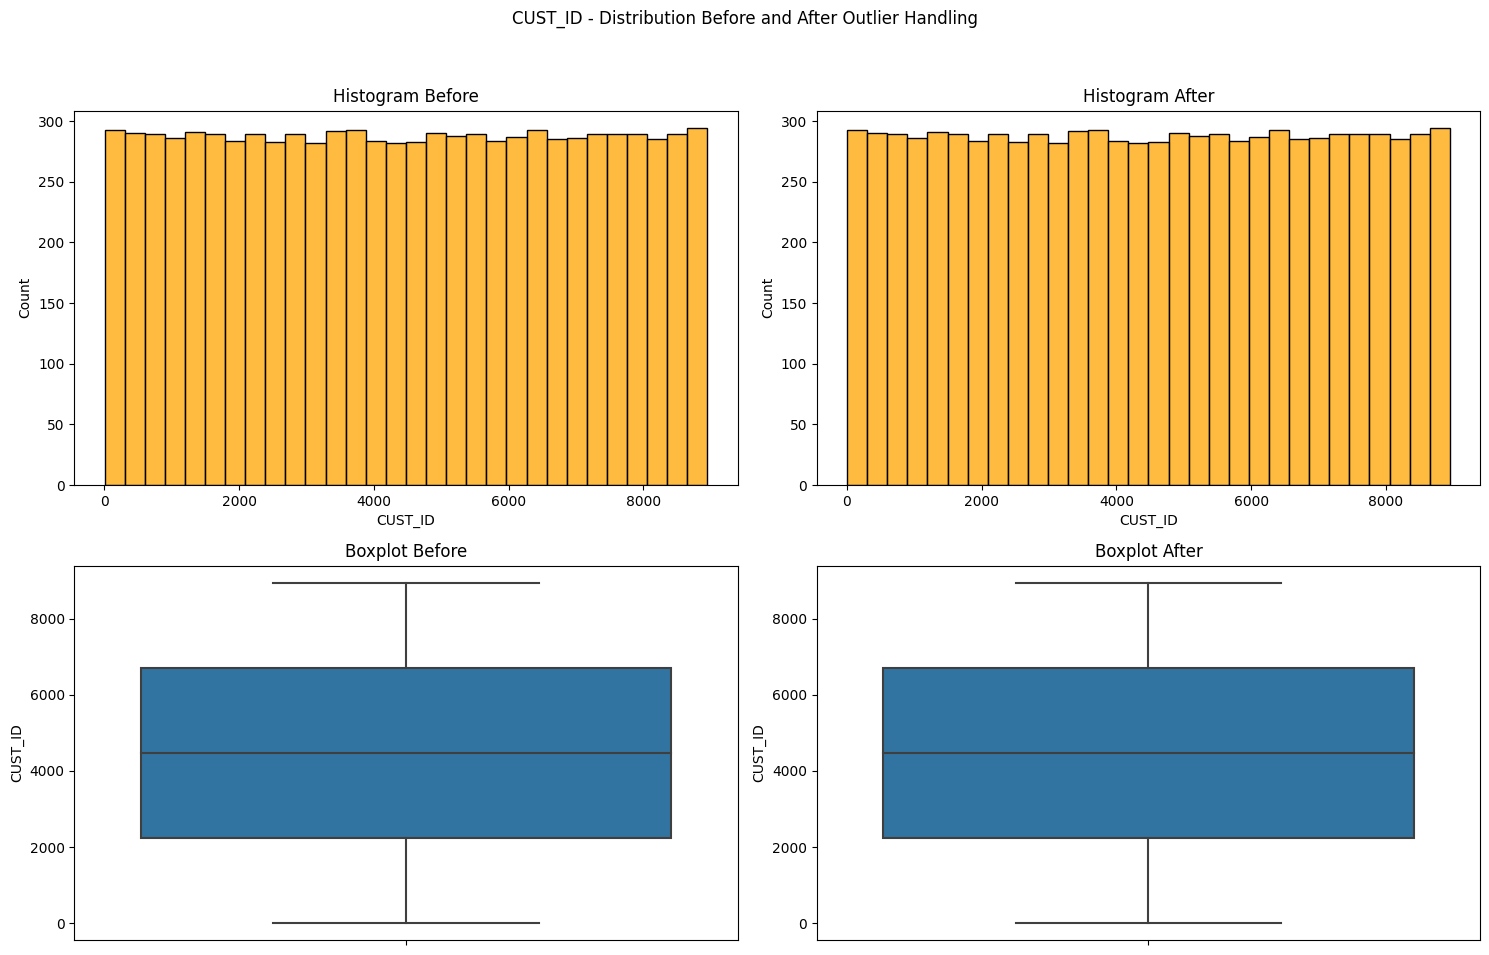

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


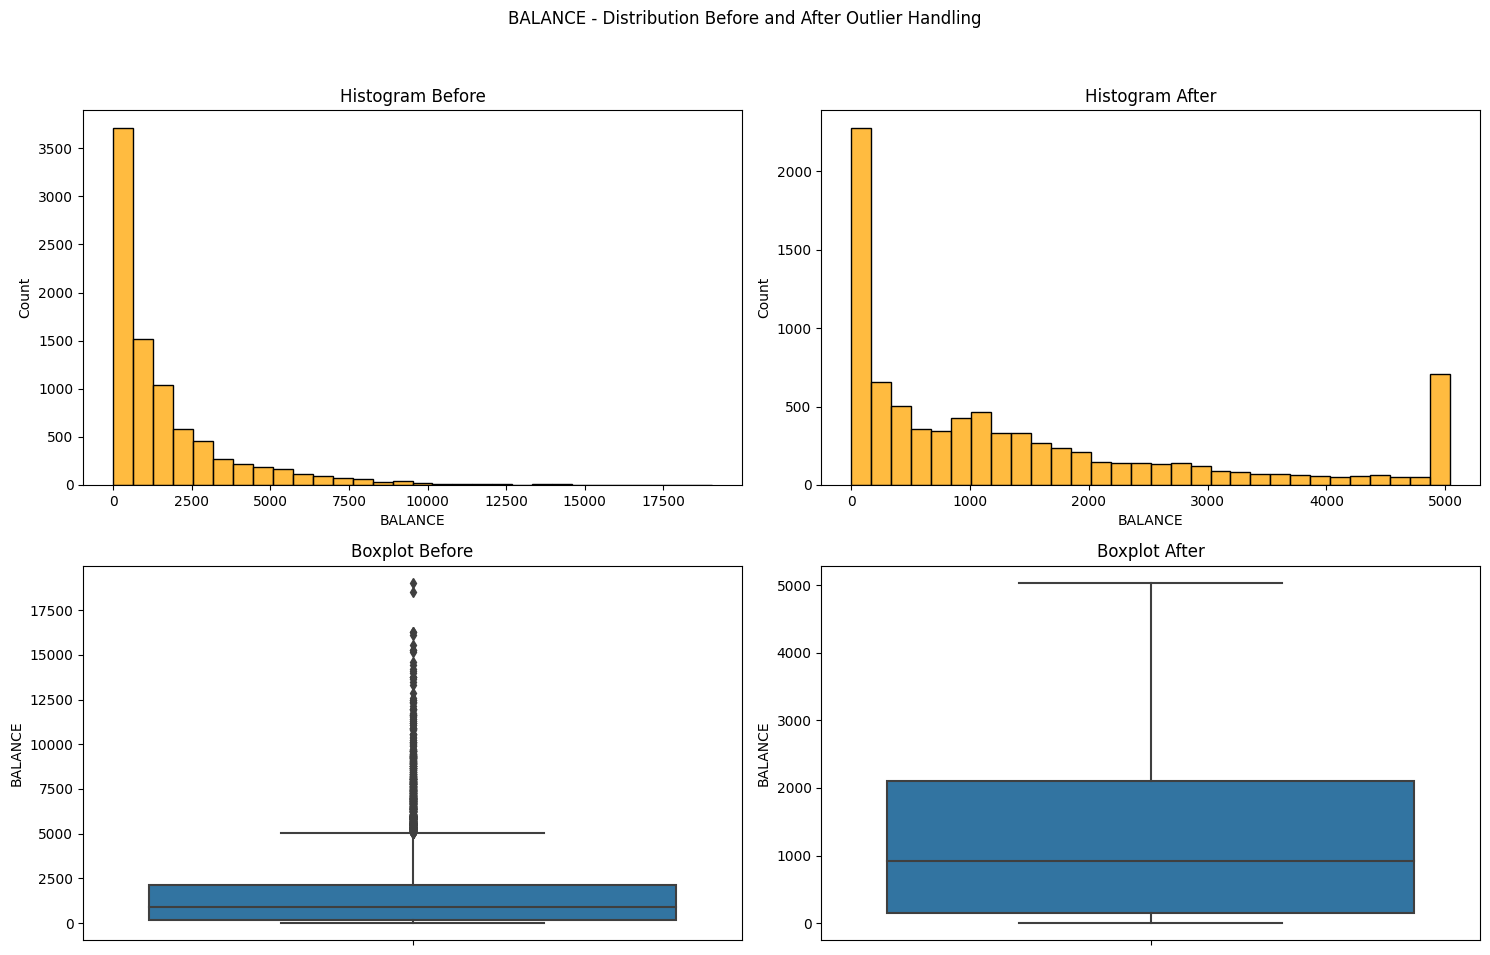

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


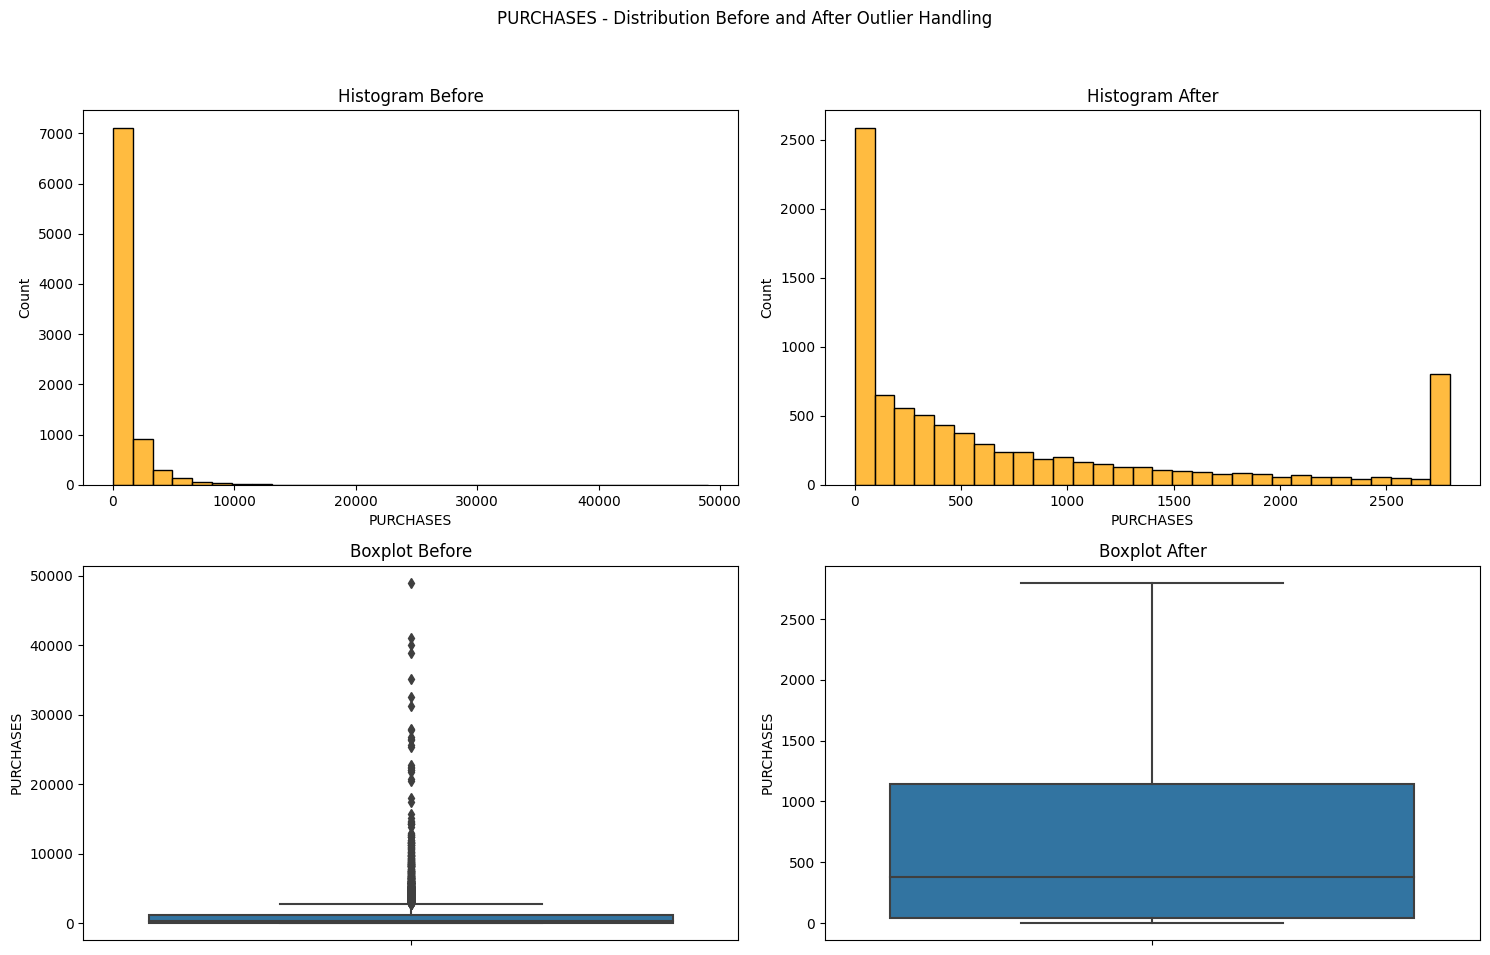

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


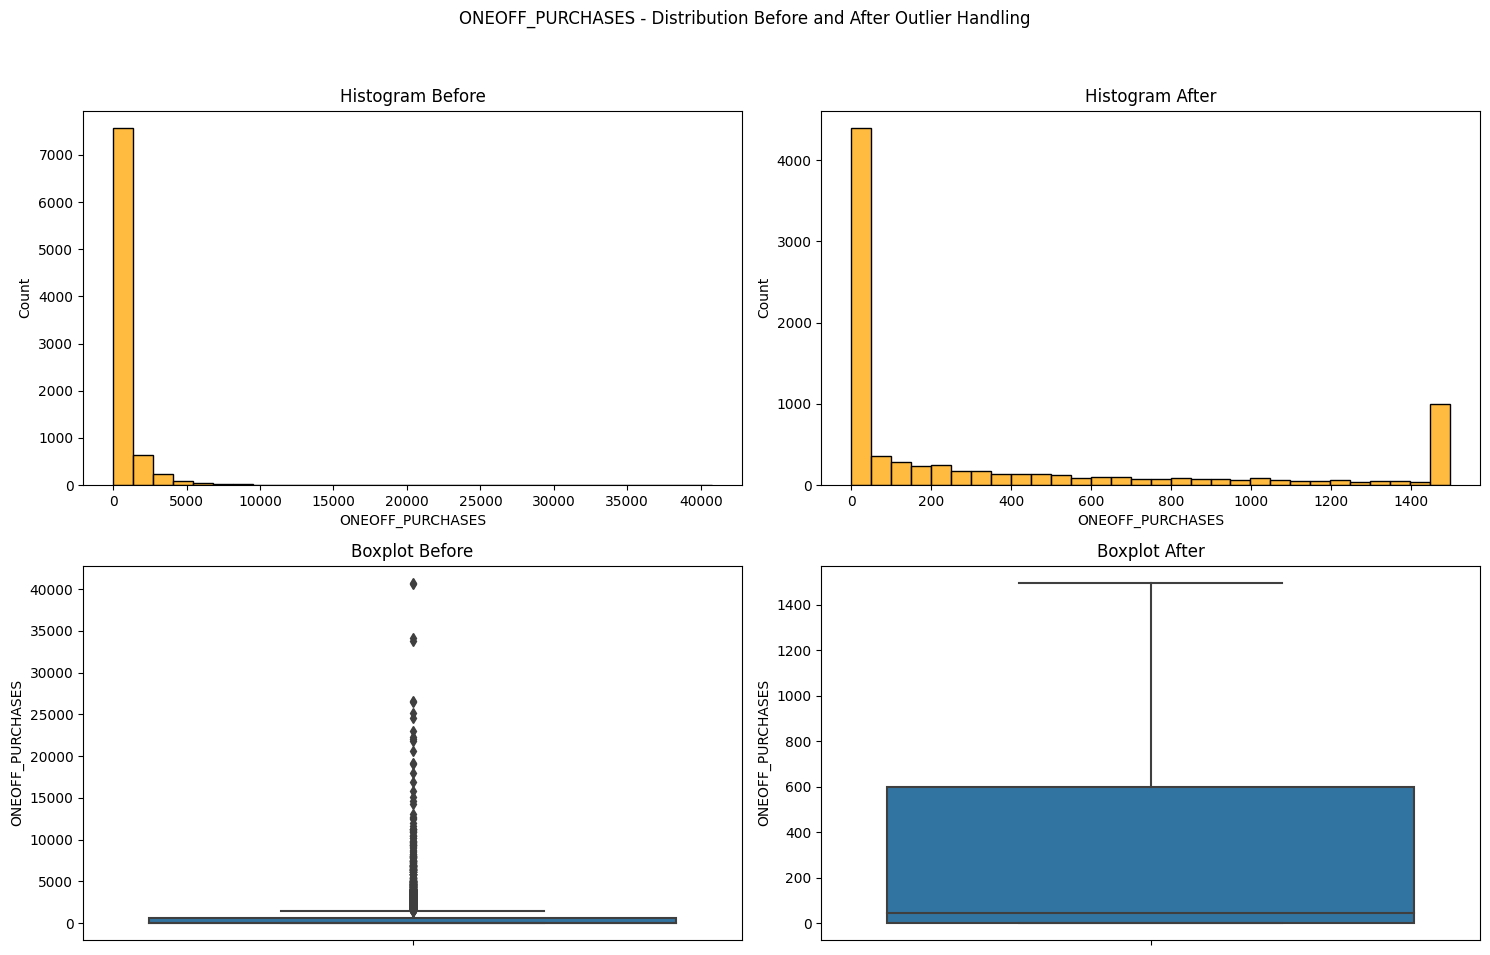

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


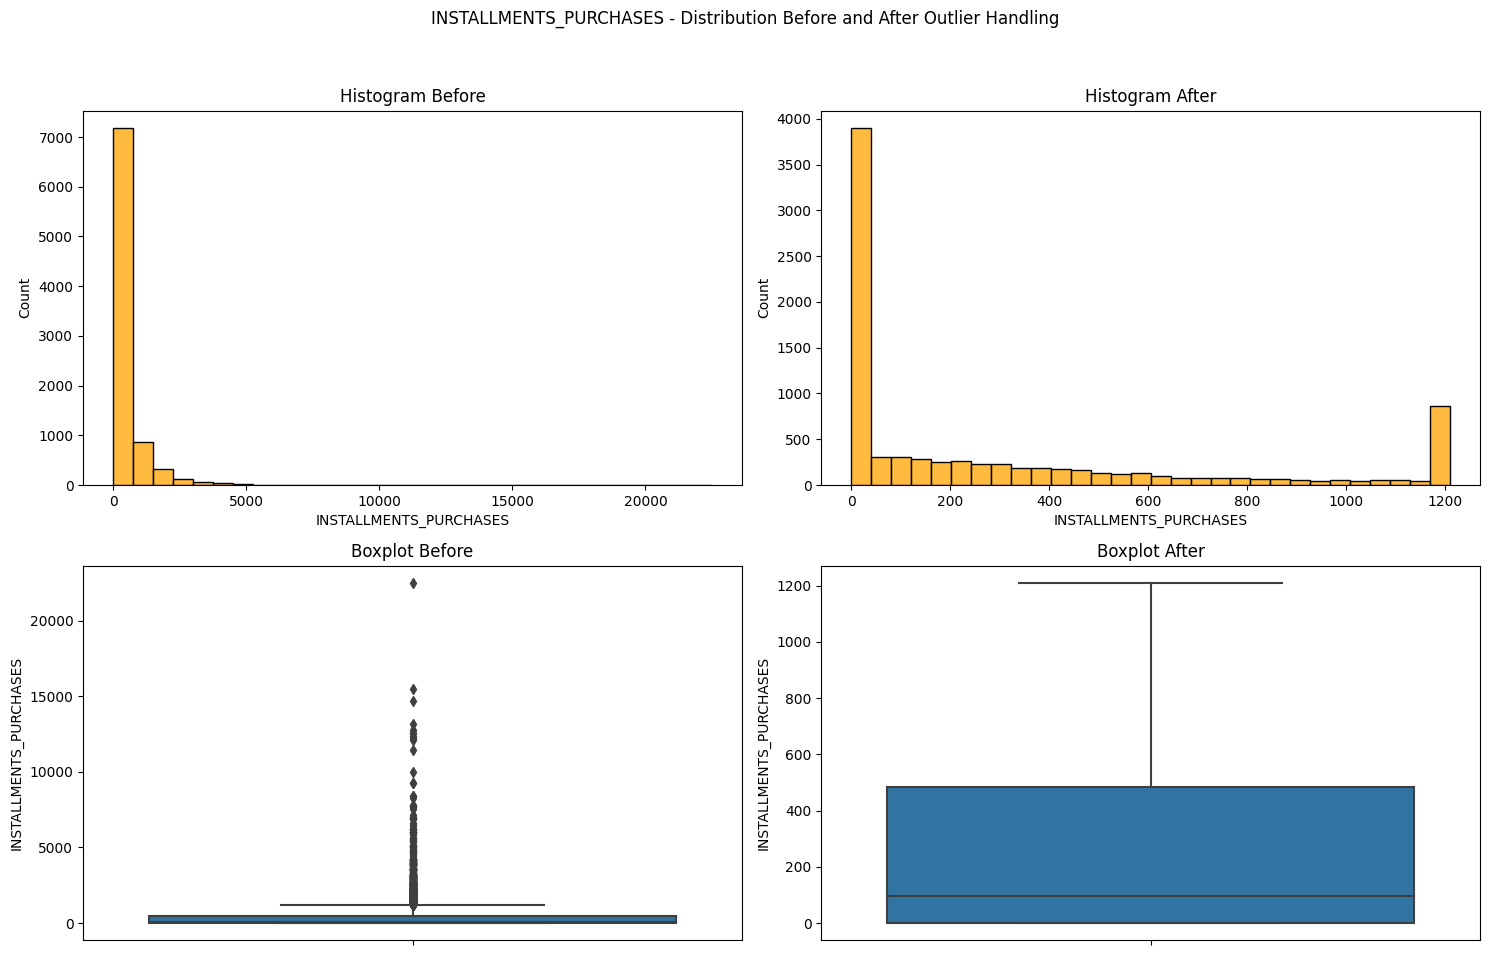

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


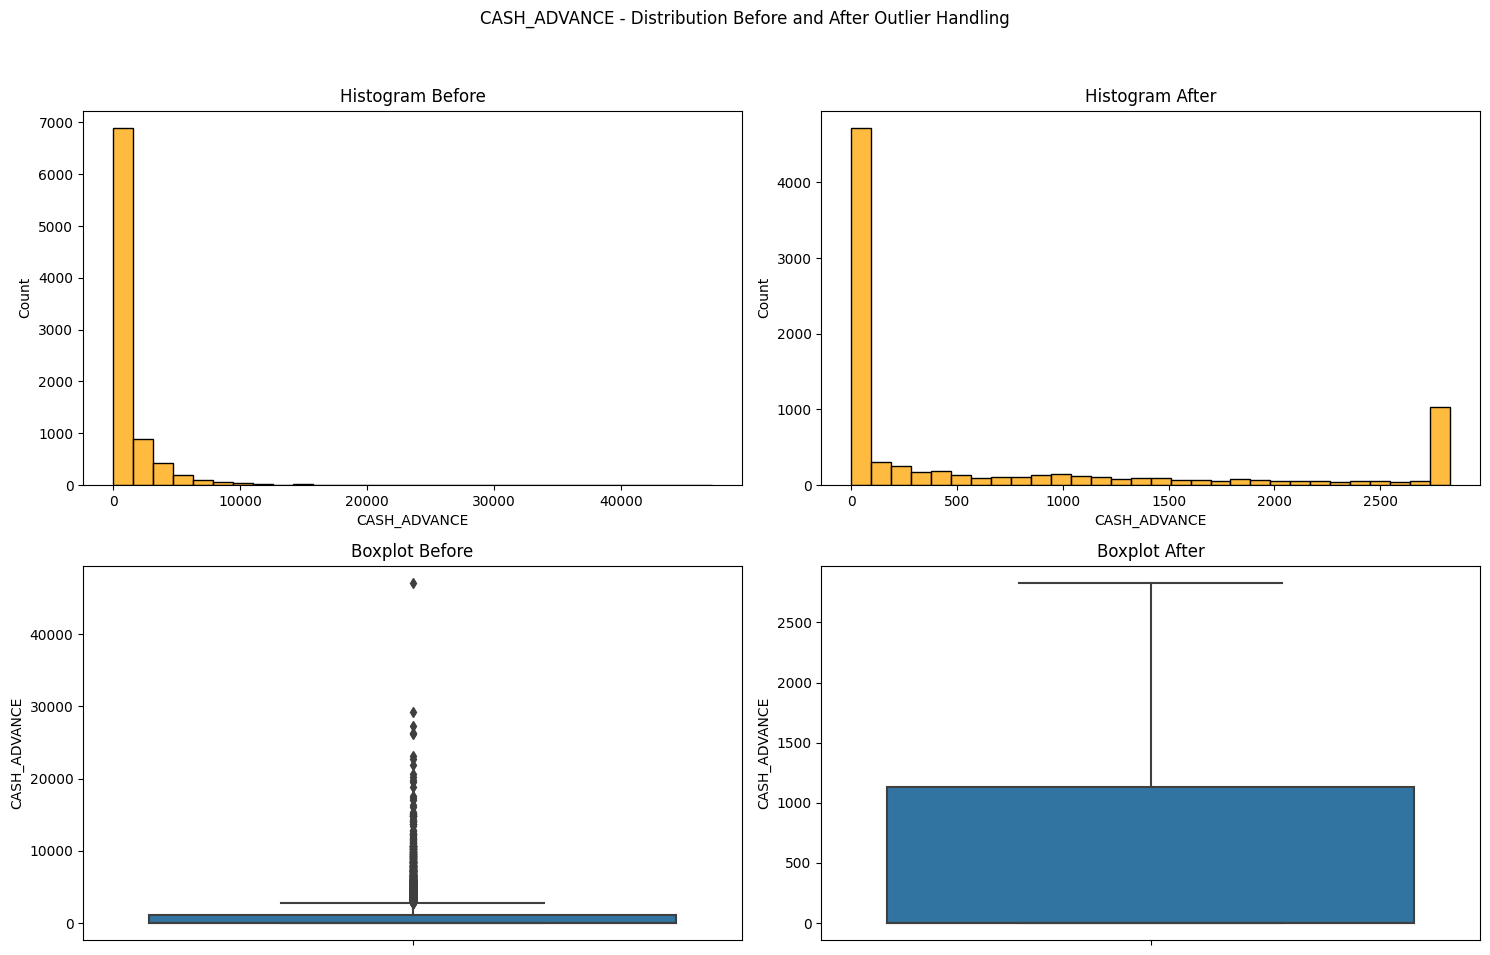

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


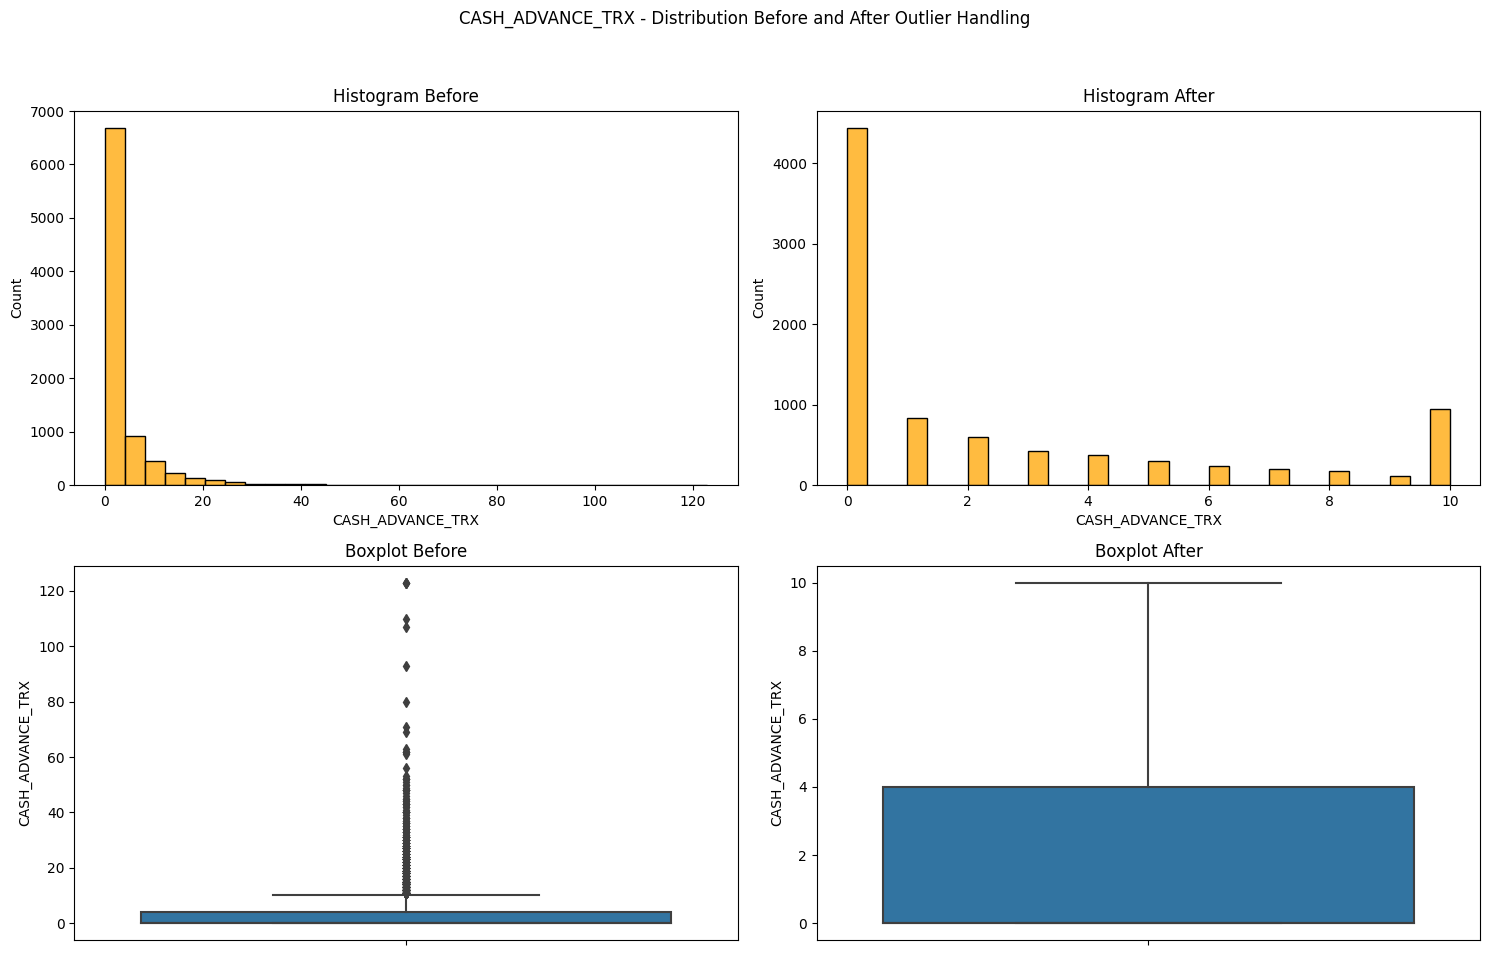

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


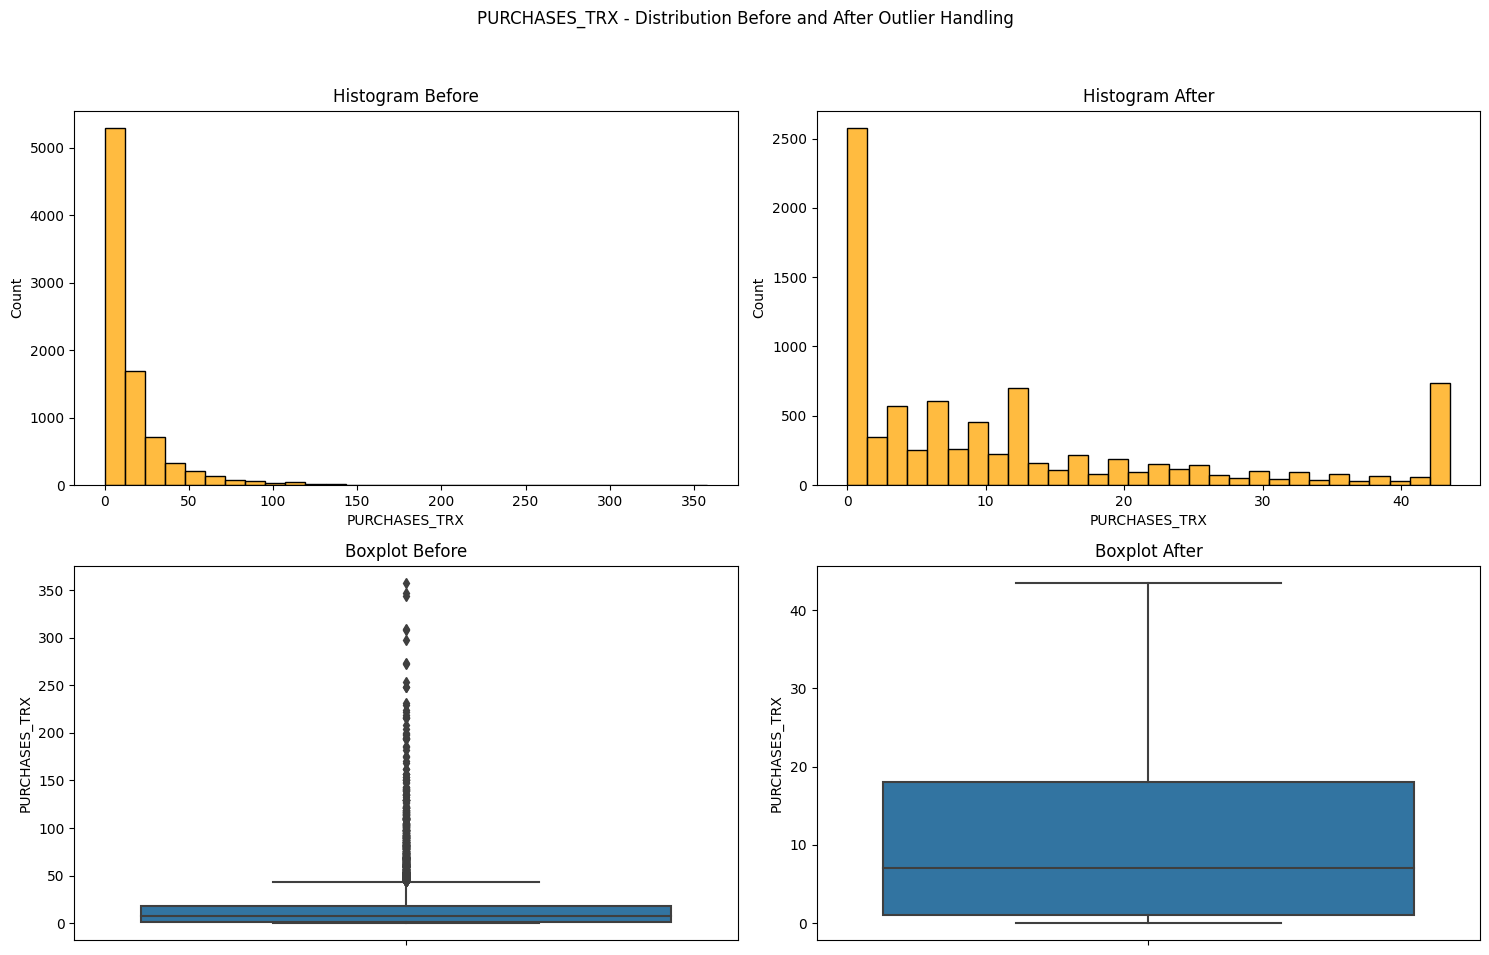

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


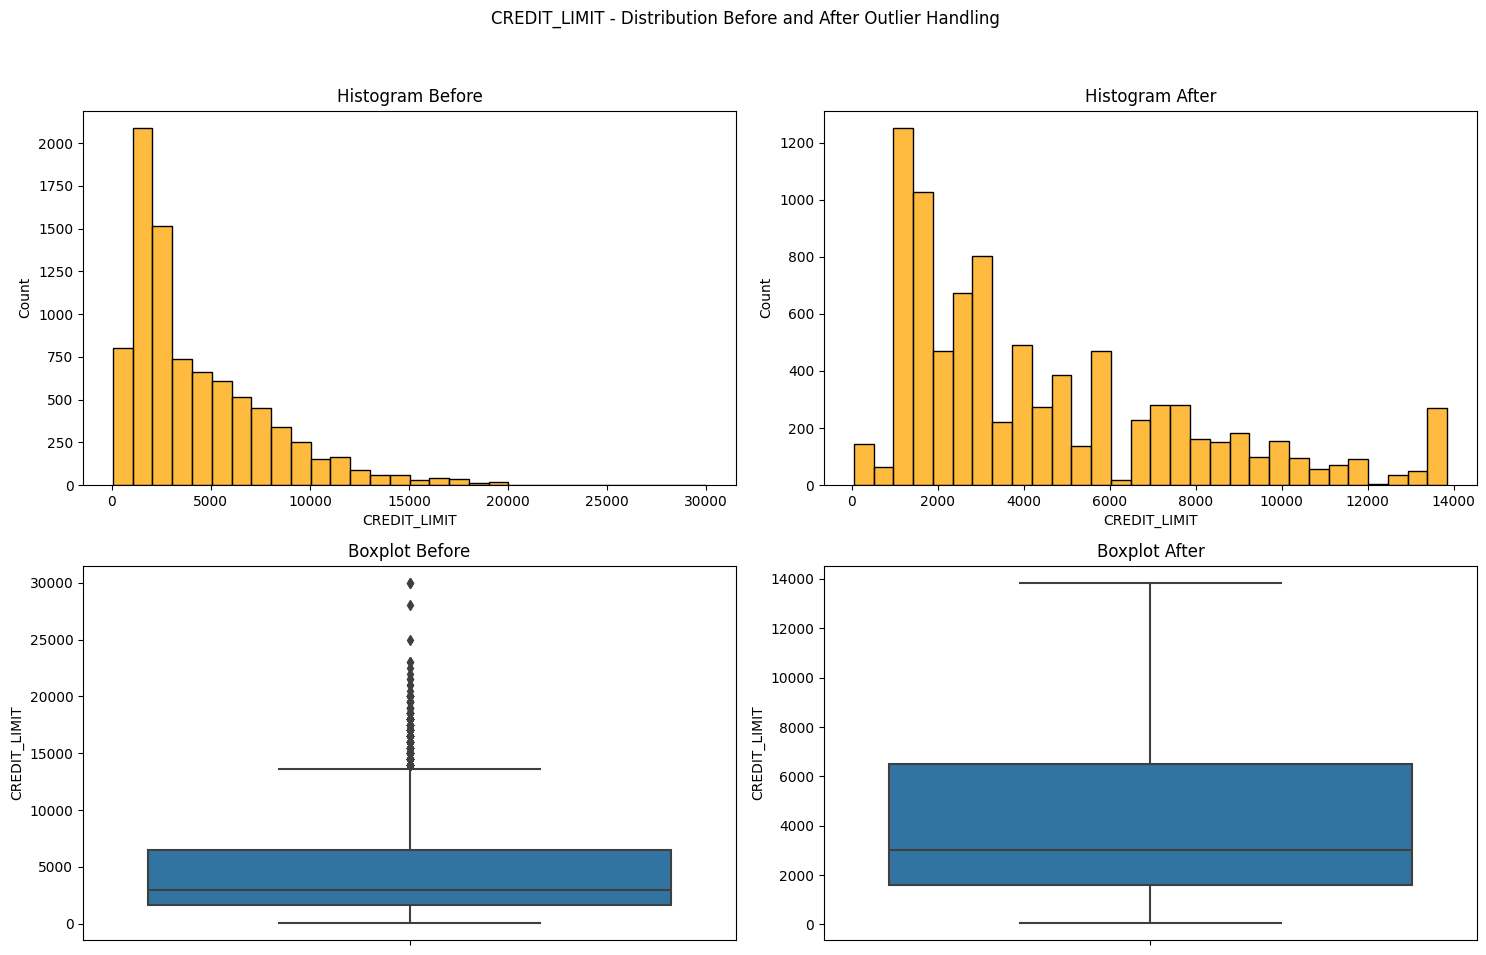

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


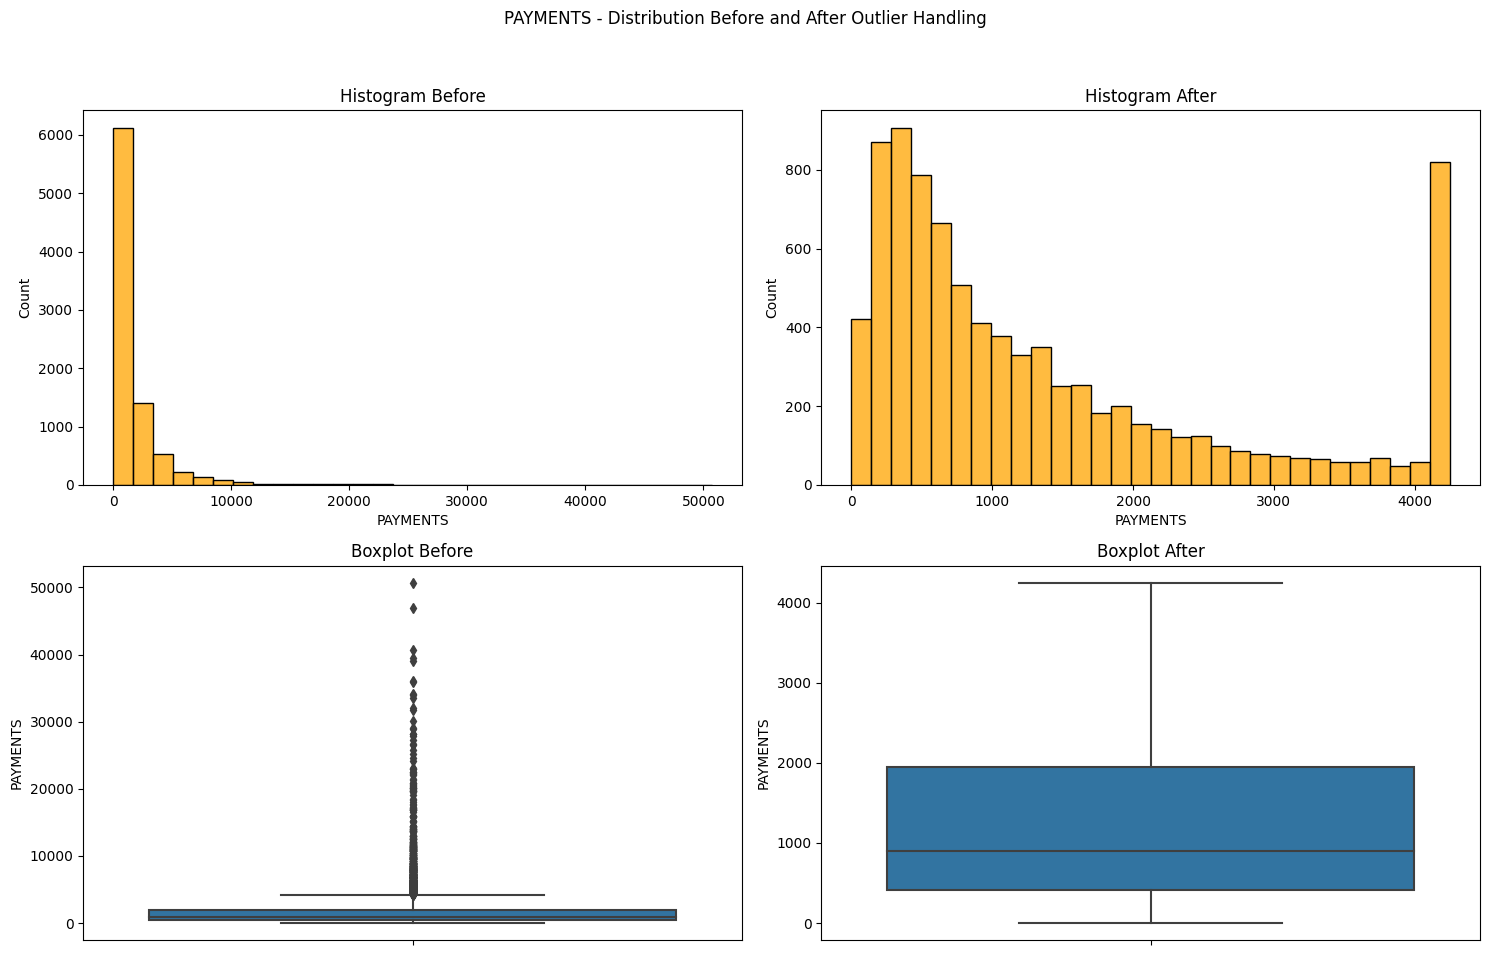

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


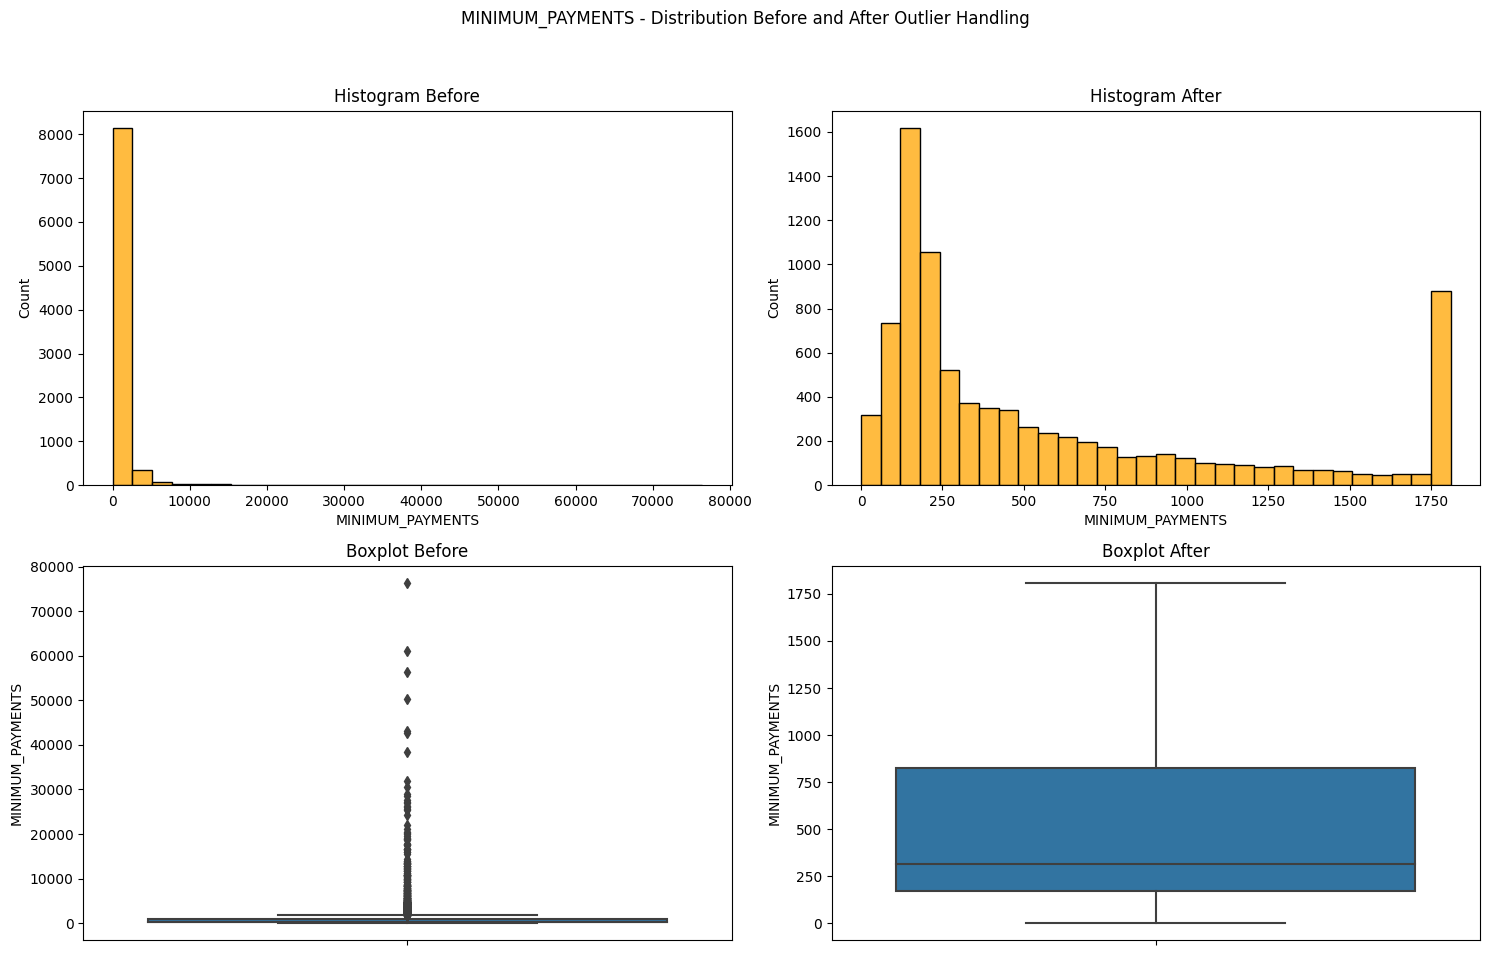

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


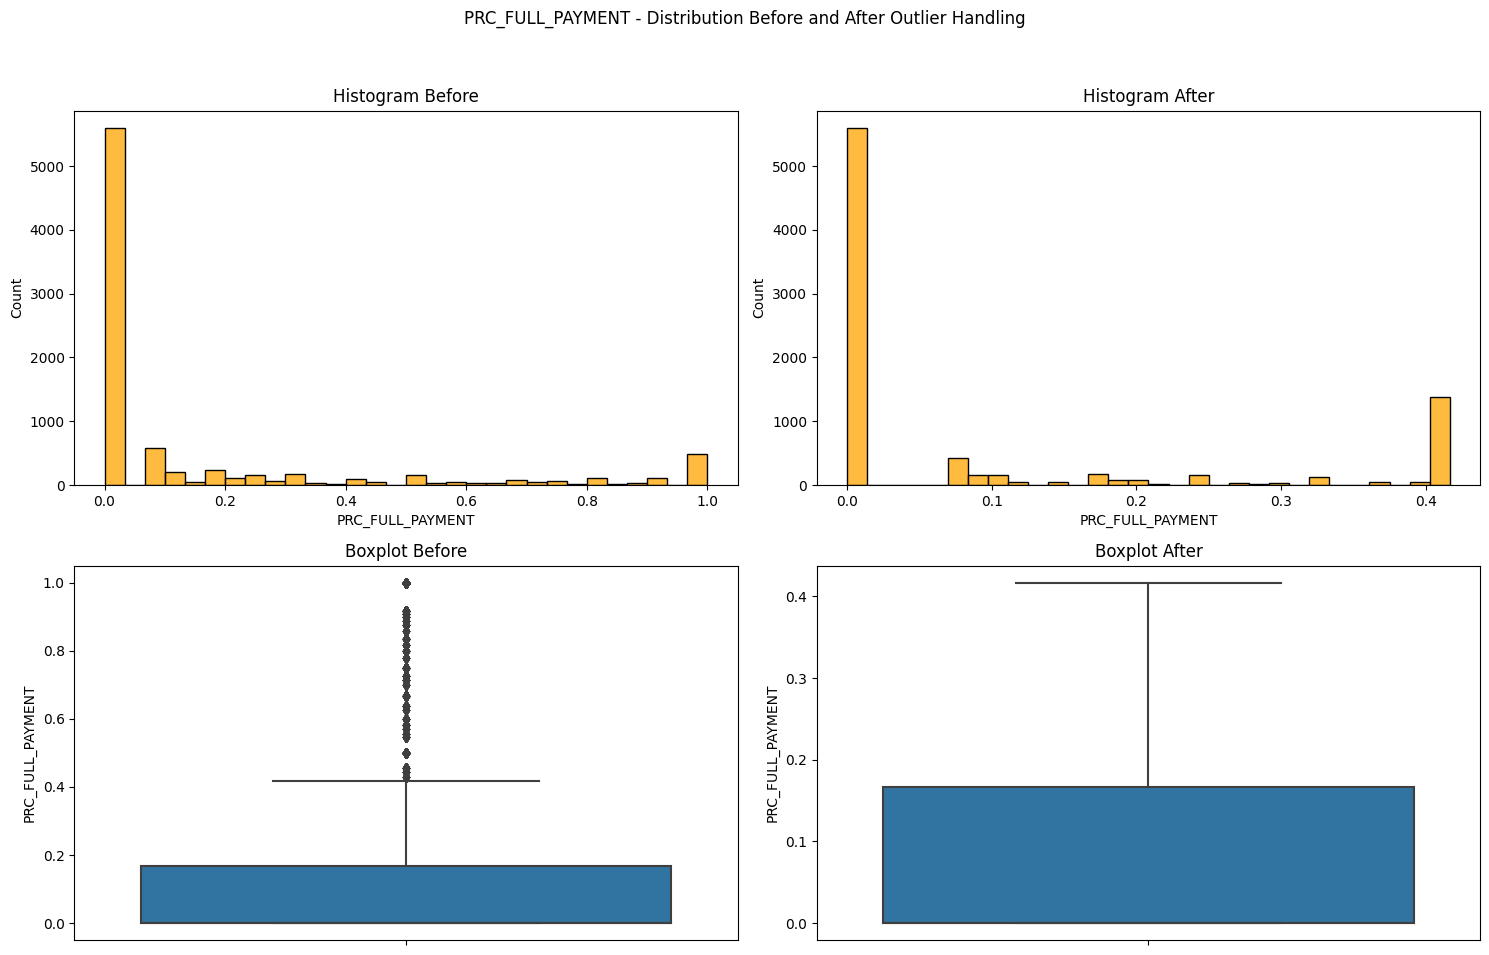

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


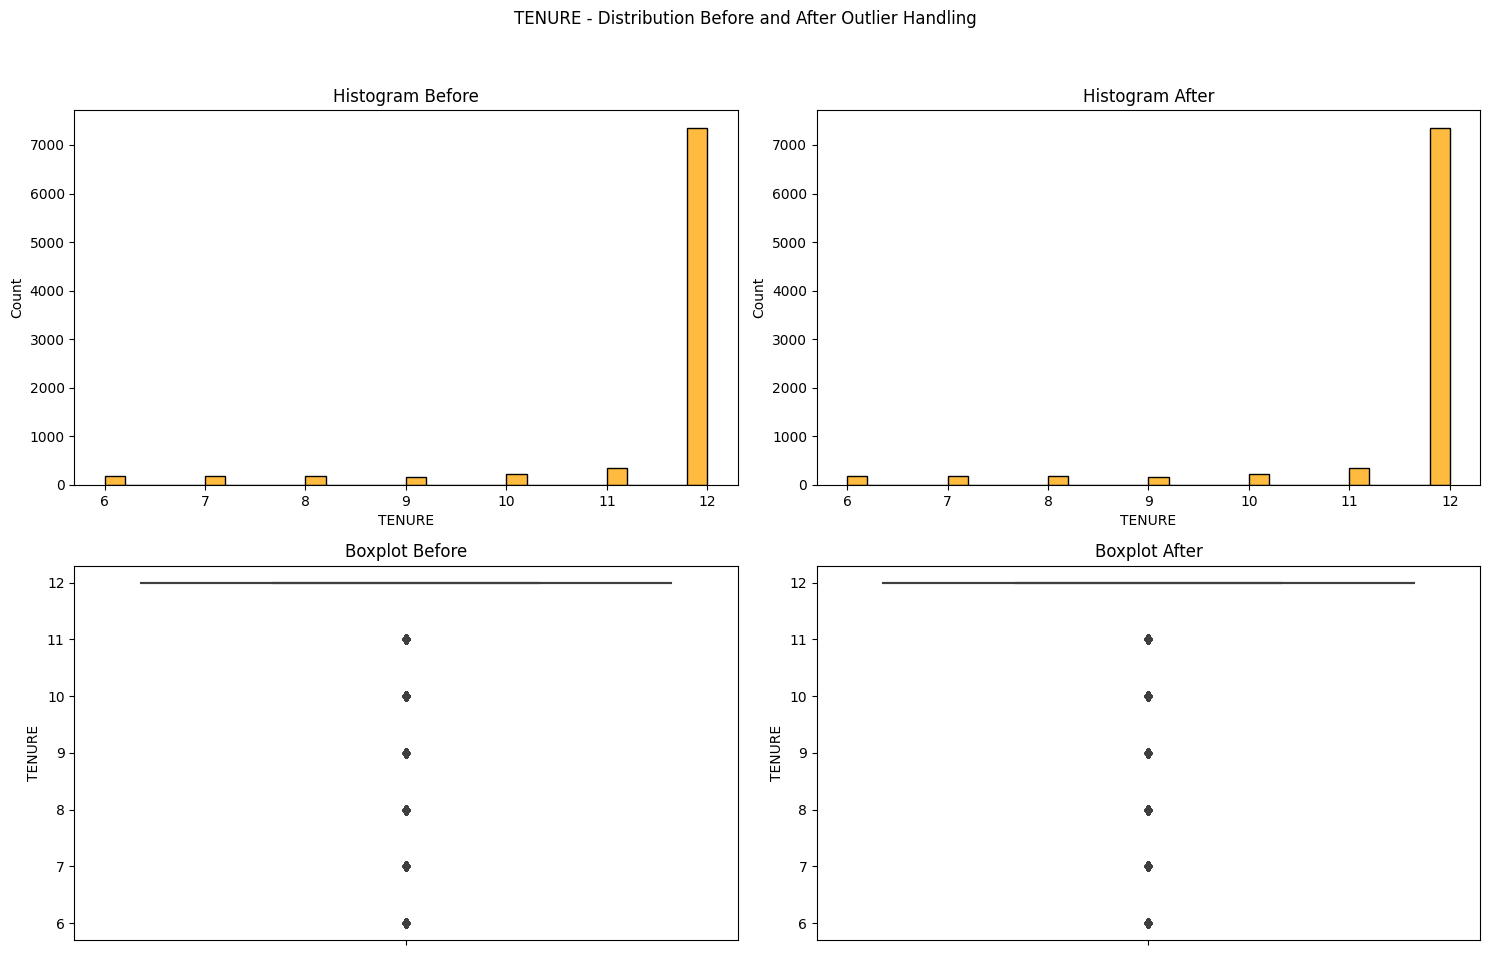

In [23]:
for num in num_columns:
    outlier_handling_plot_comparison(new_data, new_data_capped, num)

**penjelasan** :

gambar di atas menunjukkan :

* sebagian besar **outlier telah dibatasi** dan tidak ditampilkan dalam gambar
* kolom `TENURE` **masih memiliki banyak outlier** karena metode pembatasan yang tidak tepat

### Splitting Numerical and Categorical Data

Setelah menangani outlier, kita akan **membagi data** menjadi kolom kategorikal dan numerik untuk `penskalaan` dan `pengkodean`

In [24]:
# Splitting Numerical and Categorical Columns
new_data_num = new_data_capped[num_columns]
new_data_cat = new_data_capped[cat_columns]

new_data_num.head()

CUST_ID      BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
1     1902   943.584041      103.0             103.0                     0.0   
4     3426   461.455720      585.0             585.0                     0.0   
5     3976  1053.594730     1450.0            1450.0                     0.0   
6     4266  2237.238086      120.0             120.0                     0.0   
8     4680   424.994385     1200.0            1200.0                     0.0   

   CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT    PAYMENTS  \
1           0.0                 0            1.0        1000.0  215.325023   
4           0.0                 0            1.0        1000.0  258.032630   
5           0.0                 0            1.0        1500.0  397.090516   
6           0.0                 0            1.0        2500.0  343.102984   
8           0.0                 0            1.0        1200.0   57.266292   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1        410.484825               0.0       8  
4        151.696433               0.0       8  
5        227.143184               0.0       8  
6        712.986387               0.0       8  
8         56.720210               0.0       8

**penjelasan** :

tabel di atas hanya menampilkan kolom numerik yang akan diskalakan

### Scaling

Saat bekerja dengan **algoritme pengelompokan** seperti **KMeans**, kita akan menggunakan `Standard Scaler` untuk penskalaan

In [25]:
# Feature Scaling using MinMaxScaler
scaler = StandardScaler()
scaler.fit(new_data_num)

new_data_scaled = scaler.transform(new_data_num)

new_data_scaled

array([[-9.94084306e-01, -3.11974515e-01, -7.25999149e-01, ...,
        -2.94010223e-01, -6.29479916e-01, -2.69614006e+00],
       [-4.05368491e-01, -6.21259629e-01, -1.92141820e-01, ...,
        -7.55866424e-01, -6.29479916e-01, -2.69614006e+00],
       [-1.92905434e-01, -2.41402704e-01,  7.65921644e-01, ...,
        -6.21217611e-01, -6.29479916e-01, -2.69614006e+00],
       ...,
       [-9.58158735e-01,  1.29439828e+00, -6.13025191e-01, ...,
         4.32999461e-01, -6.29479916e-01, -4.07649523e-01],
       [ 2.42799586e-04,  2.18792466e+00,  9.27551934e-01, ...,
         2.20367847e+00, -5.84472010e-02, -4.07649523e-01],
       [-3.52059578e-01,  3.50965934e-01,  3.02994239e-01, ...,
         5.98730577e-01, -5.84472010e-02, -4.07649523e-01]])

**penjelasan** :

angka di atas menunjukkan data berskala

### Encode

**penjelasan** :

**Kolom kategorikal dalam kumpulan data telah dikodekan**, jadi kami tidak akan melakukan pengkodean karena pengkodean kumpulan data yang sudah dikodekan umumnya tidak diperlukan dan berpotensi menyebabkan **masalah**, **kehilangan informasi**, **peningkatan dimensi**, dan **potensi kesalahan**.

### Concate

Setelah penskalaan dan pengkodean kita akan menggabungkan data ke dalam satu kerangka data menggunakan `numpy concatenate`

In [26]:
# Concate Columns
new_data_final = np.concatenate([new_data_scaled, new_data_cat], axis=1)

new_data_final.shape

(8636, 18)

**penjelasan** :

kumpulan data akhir setelah rekayasa fitur memiliki:
* `8636 entri` data
* `18 kolom` data

Sekarang kita dapat beralih ke pengelompokan data

## 7. Model Evaluation

Untuk pengelompokan kita akan menggunakan model `K-Means` dengan menentukan jumlah cluster, jadi kita akan menggunakan `Dimensionality Reduction` untuk mengurangi jumlah fitur sambil tetap mempertahankan informasi penting, lalu menentukan jumlahnya cluster dengan `Elbow Method` dan `Silhouette Plot`

### Dimensionality Reduction

Seiring bertambahnya jumlah fitur (kolom), muncul berbagai masalah dan kompleksitas yang dapat berdampak negatif pada performa dan kemampuan interpretasi model. Jadi kita akan menggunakan `PCA Dimensionality Reduction` untuk membantu **menghilangkan fitur-fitur yang kurang penting sambil mempertahankan pola dan hubungan penting**

In [27]:
pca = PCA()
pca.fit(new_data_final)

PCA()

**penjelasan** :

menyesuaikan kumpulan data akhir ke dalam model

Text(0, 0.5, 'Eigenvalues')

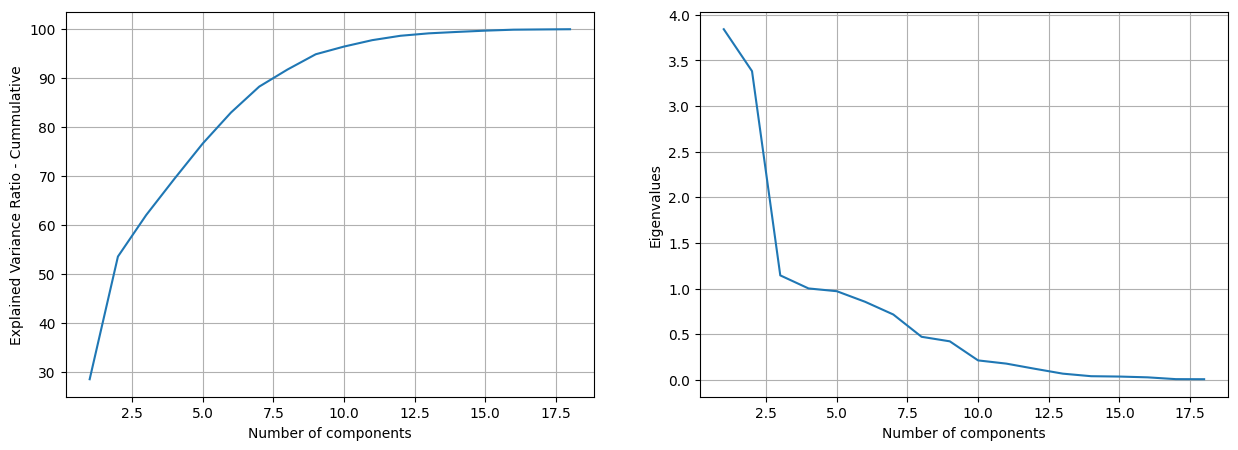

In [28]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 19), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 19), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [29]:
# Check the number of features if we want to retain 85 % of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.85) + 1
num_features

7

**penjelasan** :

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jika kita memilih **jumlah komponen sebanyak 7**, kita dapat menyimpan lebih dari `85%` informasinya.

In [30]:
# Let's train the model with 85 % of the original dataset information
pca = PCA(n_components=0.85)
pca.fit(new_data_final)

new_data_pca = pca.transform(new_data_final)

**penjelasan** :

train model dengan `85%` informasi set data aslinya

### Optimal Number of Clusters

#### Elbow Method

Untuk menemukan **jumlah cluster optimal**, kita akan menggunakan `Elbow Method`

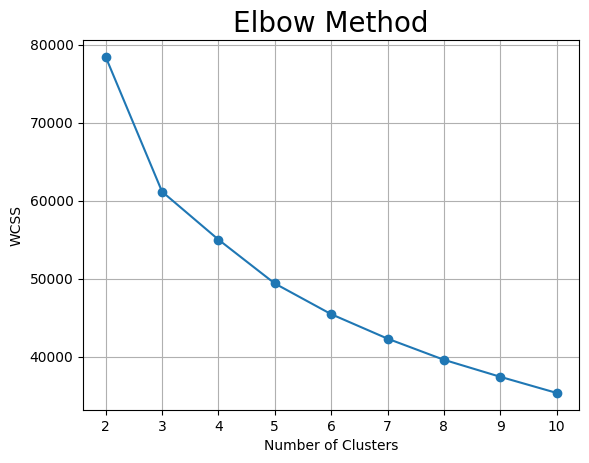

In [31]:
wcss = []
random_state = 10
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(new_data_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**keterangan** :

Dari visualisasi di atas kita dapat melihat bahwa **penurunan inersia tidak lagi signifikan** setelah `3 Cluster`

---

#### Silhouette Plot

Setelah metode siku, kita dapat menggunakan `silhouette plot` untuk **memvisualisasikan cluster** berdasarkan jumlah cluster dan menentukan **jumlah cluster mana yang lebih baik**.

Kami juga akan menghitung skor siluet untuk mengetahui kualitas cluster yang dihasilkan oleh algoritma clustering, skor siluet berkisar antara -1 hingga 1, dimana:

* 1: menunjukkan bahwa cluster-cluster tersebut berjauhan satu sama lain dan dapat dibedakan dengan jelas.
* 0: menunjukkan cluster yang tumpang tindih.
* -1: menunjukkan pengelompokan yang salah.

In [32]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.28634498915690465
For n_clusters = 3 The average silhouette_score is : 0.27542047979071504
For n_clusters = 4 The average silhouette_score is : 0.278842162788726
For n_clusters = 5 The average silhouette_score is : 0.22506746616520543
For n_clusters = 6 The average silhouette_score is : 0.22307830493146244
For n_clusters = 7 The average silhouette_score is : 0.20948030372971946
For n_clusters = 8 The average silhouette_score is : 0.21296253452139263
For n_clusters = 9 The average silhouette_score is : 0.19391234433015092


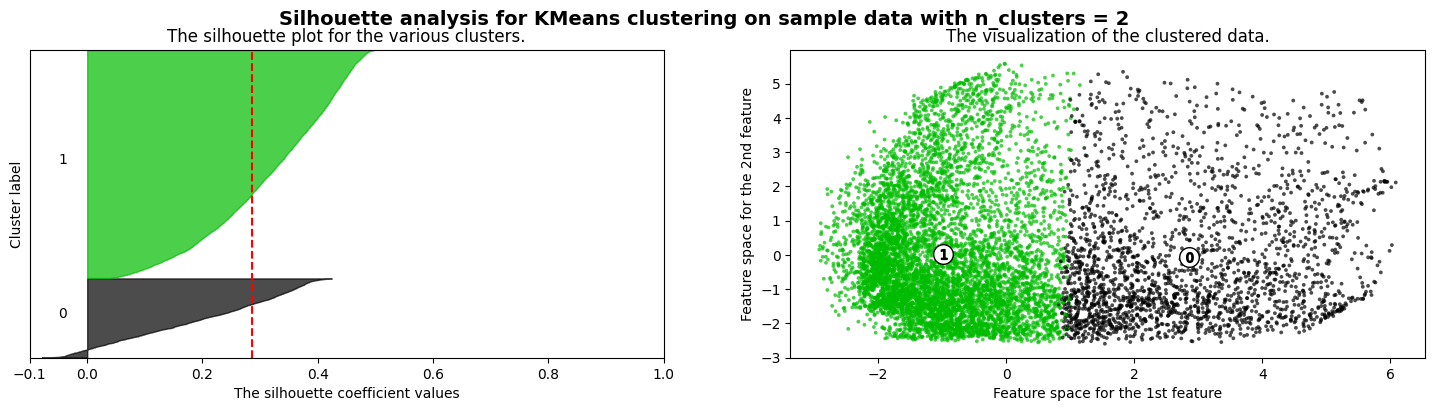

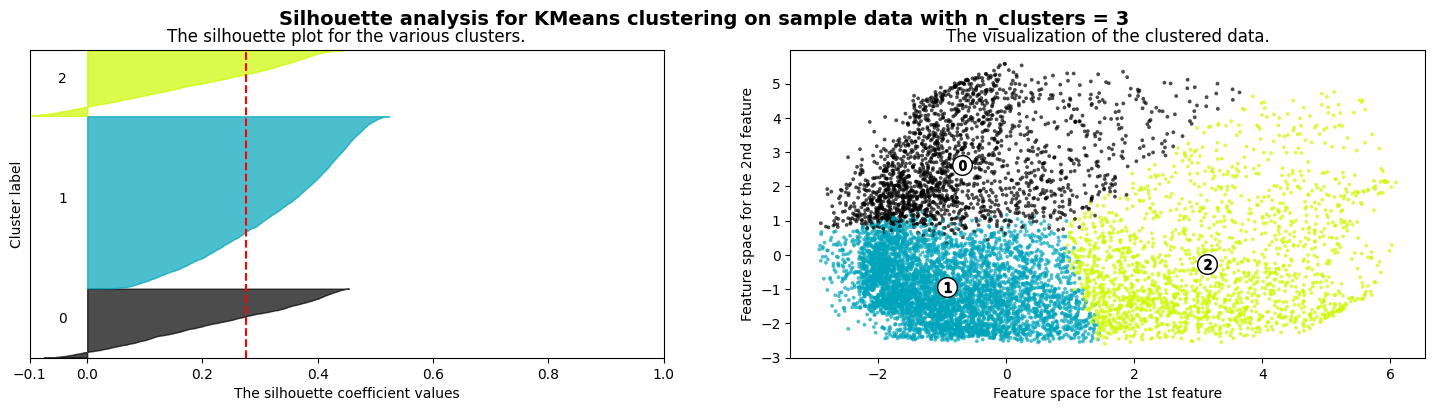

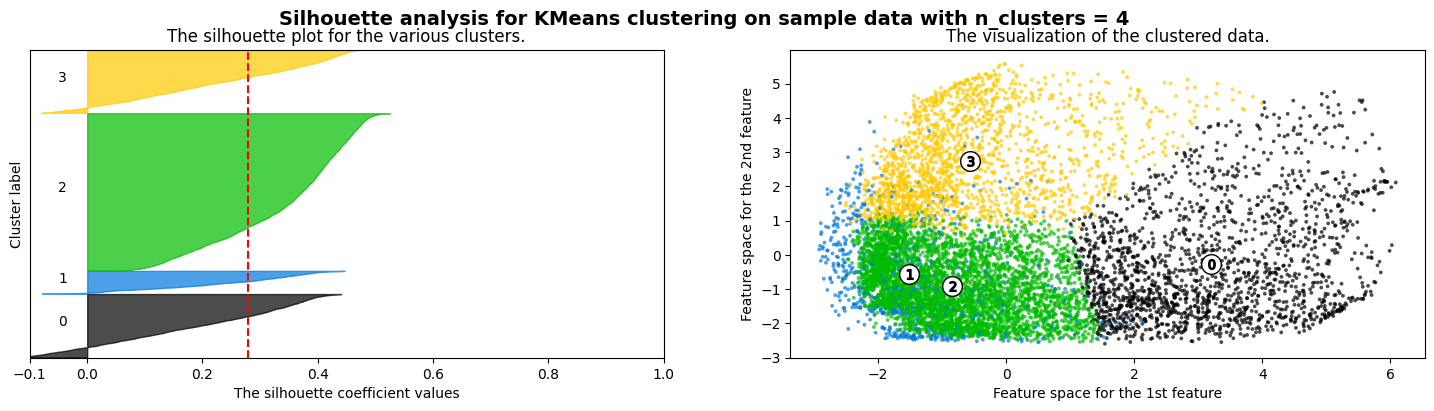

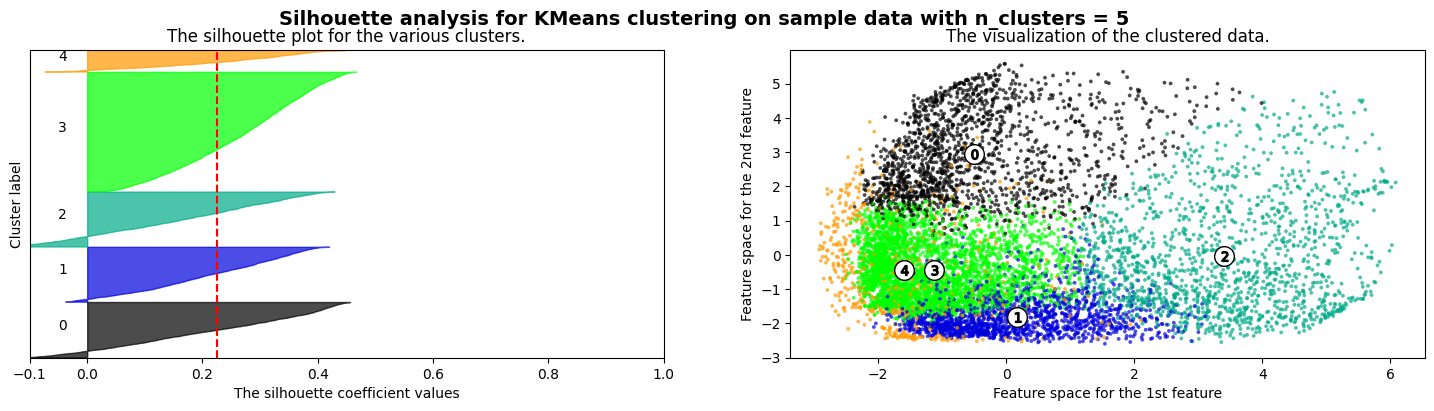

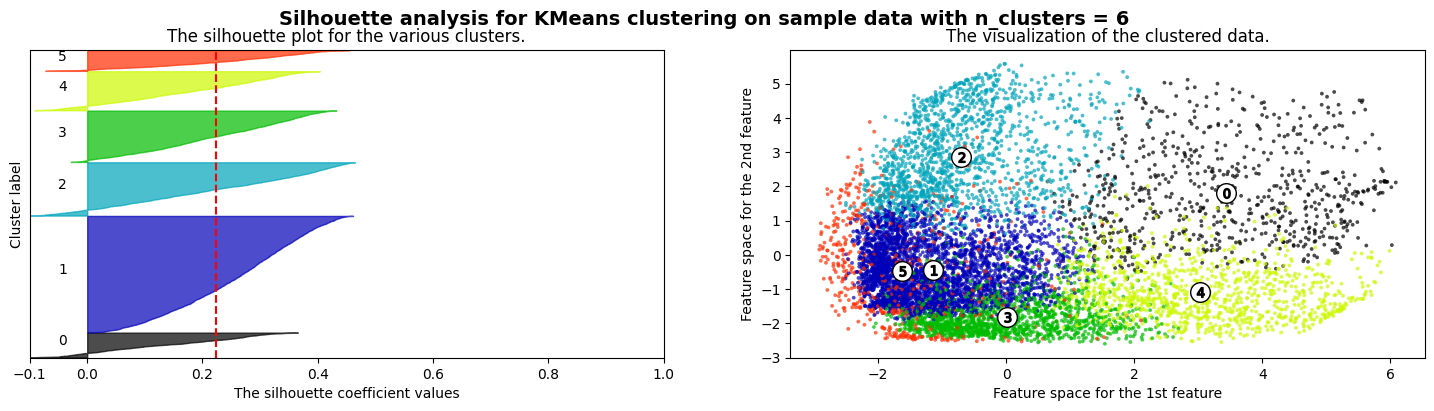

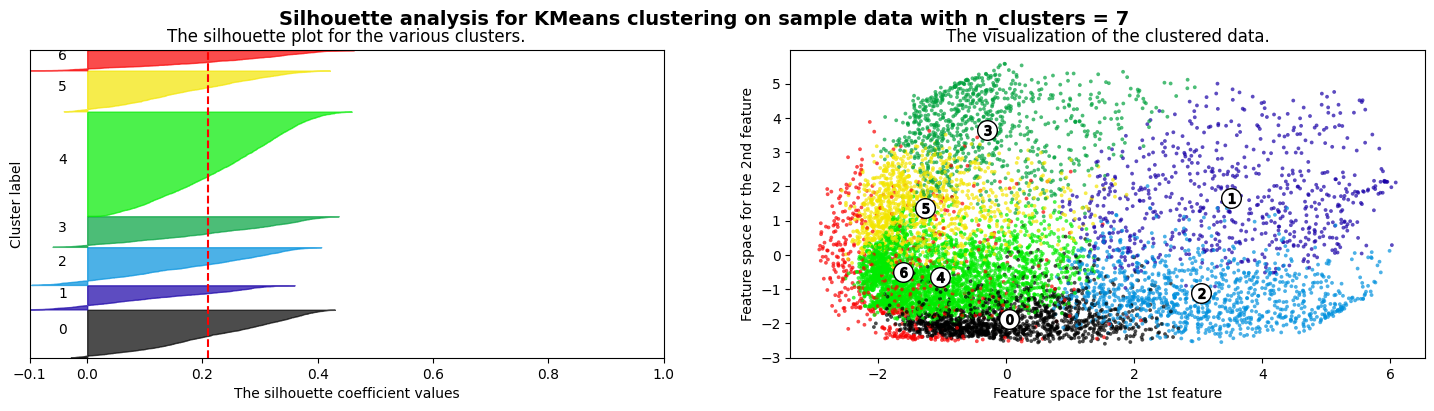

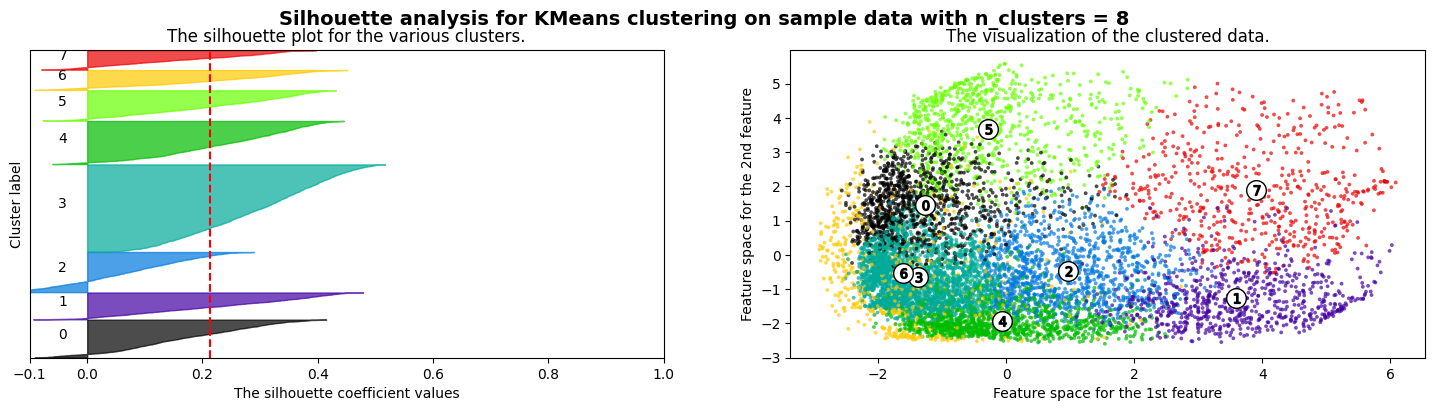

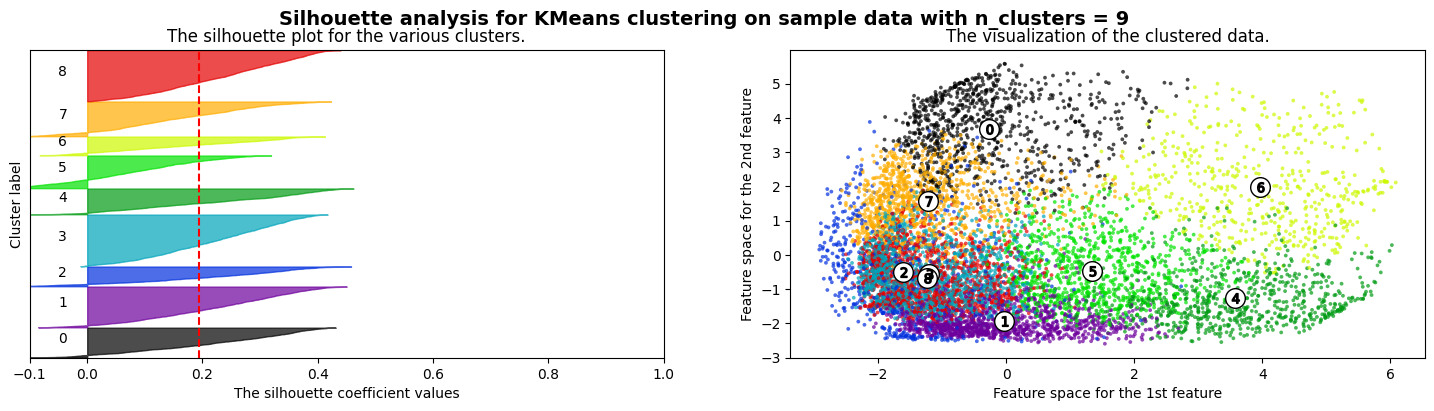

In [33]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), new_data_pca, random_state)

**penjelasan** :

silhouette plot di atas menunjukkan :
- **silhouette score** tertinggi ada pada cluster `2 (0,28)`, cluster `3 (0,27)`, dan cluster `4 (0,28)`
- **best visualization** dari data yang dikelompokkan adalah dengan `3` cluster

sebagai kesimpulan, kita akan menggunakan `3 cluster`

## 8. Model Definition

Dari `Elbow Method` dan `Silhoette Plot` di atas, kita menyimpulkan bahwa jumlah klaster yang optimal adalah **`3`**, sekarang kita dapat beralih ke pelatihan model menggunakan `K-Means` untuk pengelompokan

#### K-Means

In [34]:
# Train with optimal number of clusters
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(new_data_pca)
pred

array([1, 1, 1, ..., 0, 0, 0])

**penjelasan** :

melatih model `K-Means` dengan jumlah cluster optimal yaitu `3` dan memprediksi setiap data berdasarkan **kumpulan data yang dikurangi dimensinya**

In [35]:
# Insert clustering result into original dataset
new_data['CLUSTER'] = pred
new_data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1        1902   943.584041           0.875000     103.00            103.00   
4        3426   461.455720           1.000000     585.00            585.00   
5        3976  1053.594730           1.000000    1450.00           1450.00   
6        4266  2237.238086           1.000000     120.00            120.00   
8        4680   424.994385           0.375000    1200.00           1200.00   
...       ...          ...                ...        ...               ...   
8945     8614   809.582978           0.909091       0.00              0.00   
8946     4296  3386.490883           1.000000     560.98            427.22   
8947     1995  3447.674222           1.000000     205.00            205.00   
8948     4476  4840.545574           1.000000    1595.93           1595.93   
8949     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
6                       0.00      0.000000             0.125000   
8                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
8945                    0.00   3819.672466             0.000000   
8946                  133.76   2008.153534             1.000000   
8947                    0.00   4548.057776             0.090909   
8948                    0.00   4359.325750             0.454545   
8949                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
6                       0.125000                          0.000000   
8                       0.125000                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.000000   
8946                    0.727273                          0.363636   
8947                    0.090909                          0.000000   
8948                    0.454545                          0.000000   
8949                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1000.0   
5                   0.000000                 0              1        1500.0   
6                   0.000000                 0              1        2500.0   
8                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.545455                 7              0        4150.0   
8946                0.545455                 9             20       10100.0   
8947                0.545455                 7              1       10500.0   
8948                0.545455                17             25        6000.0   
8949                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
1      215.325023        410.484825          0.000000       8        1  
4      258.032630        151.696433          0.000000       8        1  
5      397.090516        227.143184          0.000000       8        1  
6      343.102984        712.986387          0.000000       8        1  
8       57.266292         56.720210          0.000000       8        1  
...           ...               ... 

**penjelasan** :

membuat kolom baru di dataset dengan cluster yang diprediksi

## 9. Exploratory Data Analysis After Clustering


<Axes: >

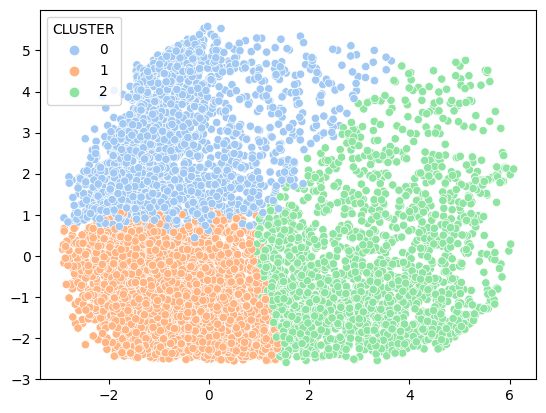

In [36]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=2)
pca_2d.fit(new_data_final)

new_data_final_pca_2d = pca_2d.fit_transform(new_data_final)

sns.scatterplot(x=new_data_final_pca_2d[:,0], y=new_data_final_pca_2d[:,1], hue=new_data['CLUSTER'], palette='pastel')

**penjelasan** :

gambar di atas menunjukkan visualisasi cluster

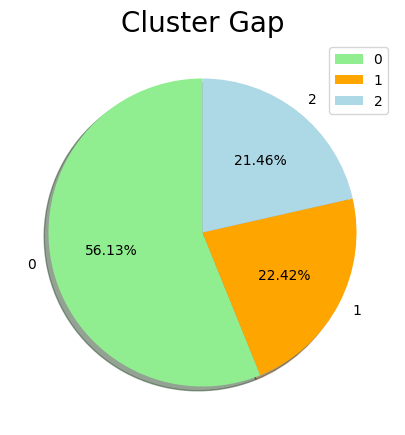

In [37]:
labels = ['0', '1', '2']
size = new_data['CLUSTER'].value_counts()
colors = ['lightgreen', 'orange', 'lightblue']

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Cluster Gap', fontsize = 20)
plt.legend()
plt.show()

**penjelasan** :

gambar di atas menunjukkan:
* `Cluster 0` memiliki mayoritas dengan **56,13%**
* `Cluster 1` hanya sedikit di atas Cluster 2 dengan **22,42%**
* `Cluster 2` memiliki minoritas dengan **21.46%**

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated

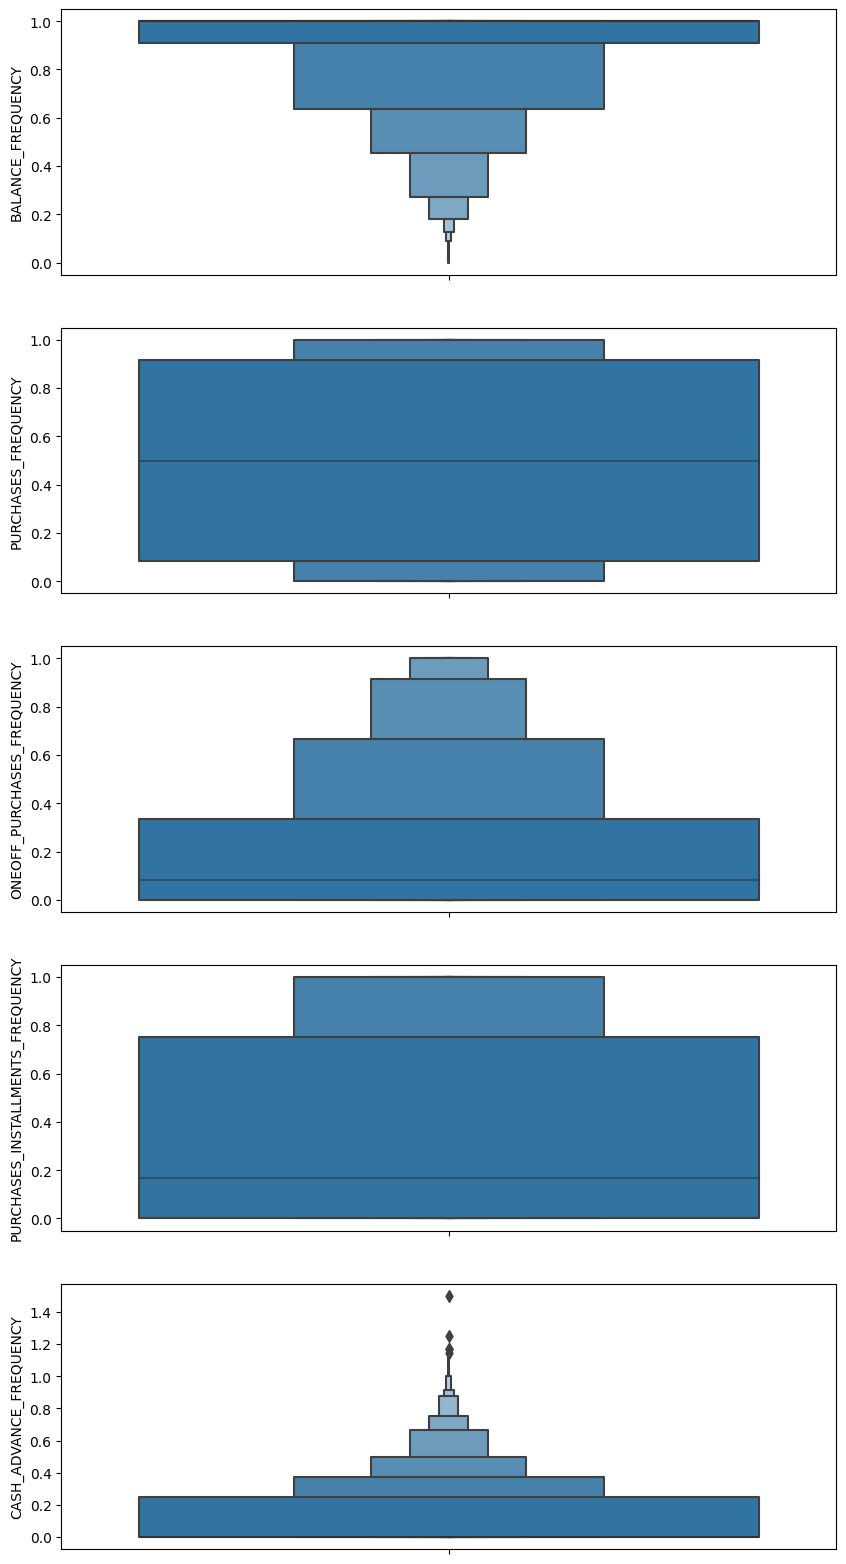

In [38]:
# Check clusters vs categorical columns
fig = plt.figure(figsize=(10, 20))
cols = cat_columns
num_rows = 5
num_cols = 1

for index in range(1, num_rows*num_cols + 1):
    fig.add_subplot(num_rows, num_cols, index)
    sns.boxenplot(data=new_data, hue= 'CLUSTER', y= cols[index-1])
plt.show()

**description** :

**`HOW FREQUENTLY EACH CLUSTER UPDATE THEIR BALANCE`** :
- CLUSTER **1** > CLUSTER **0** > CLUSTER **2**

**`HOW FREQUENTLY EACH CLUSTER PURCHASES`** :
- CLUSTER **2** > CLUSTER **1** > CLUSTER **0**

**`HOW FREQUENTLY EACH CLUSTER PURCHASES IN ONE-GO`** :
- CLUSTER **2** > CLUSTER **1** > CLUSTER **0**

**`HOW FREQUENTLY EACH CLUSTER PURCHASES WITH INSTALLMENTS`** :
- CLUSTER **2** > CLUSTER **1** > CLUSTER **0**

**`HOW FREQUENTLY EACH USER PAY WITH CASH IN ADVANCE`** :
- CLUSTER **0** > CLUSTER **2** > CLUSTER **1**

**ringkasan** :

- `Cluster 0` paling jarang **pembelian**, **pembelian sekaligus**, dan **pembelian dengan cicilan**. tapi paling sering **membayar dengan uang tunai di muka**

- `Cluster 1` berada di antara Cluster 0 dan Cluster 2, namun paling sering **memperbarui saldonya**

- `Cluster 2` paling sering **membeli**, **membeli sekaligus**, dan **membeli dengan cicilan**, namun paling jarang **memperbarui saldo**

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated

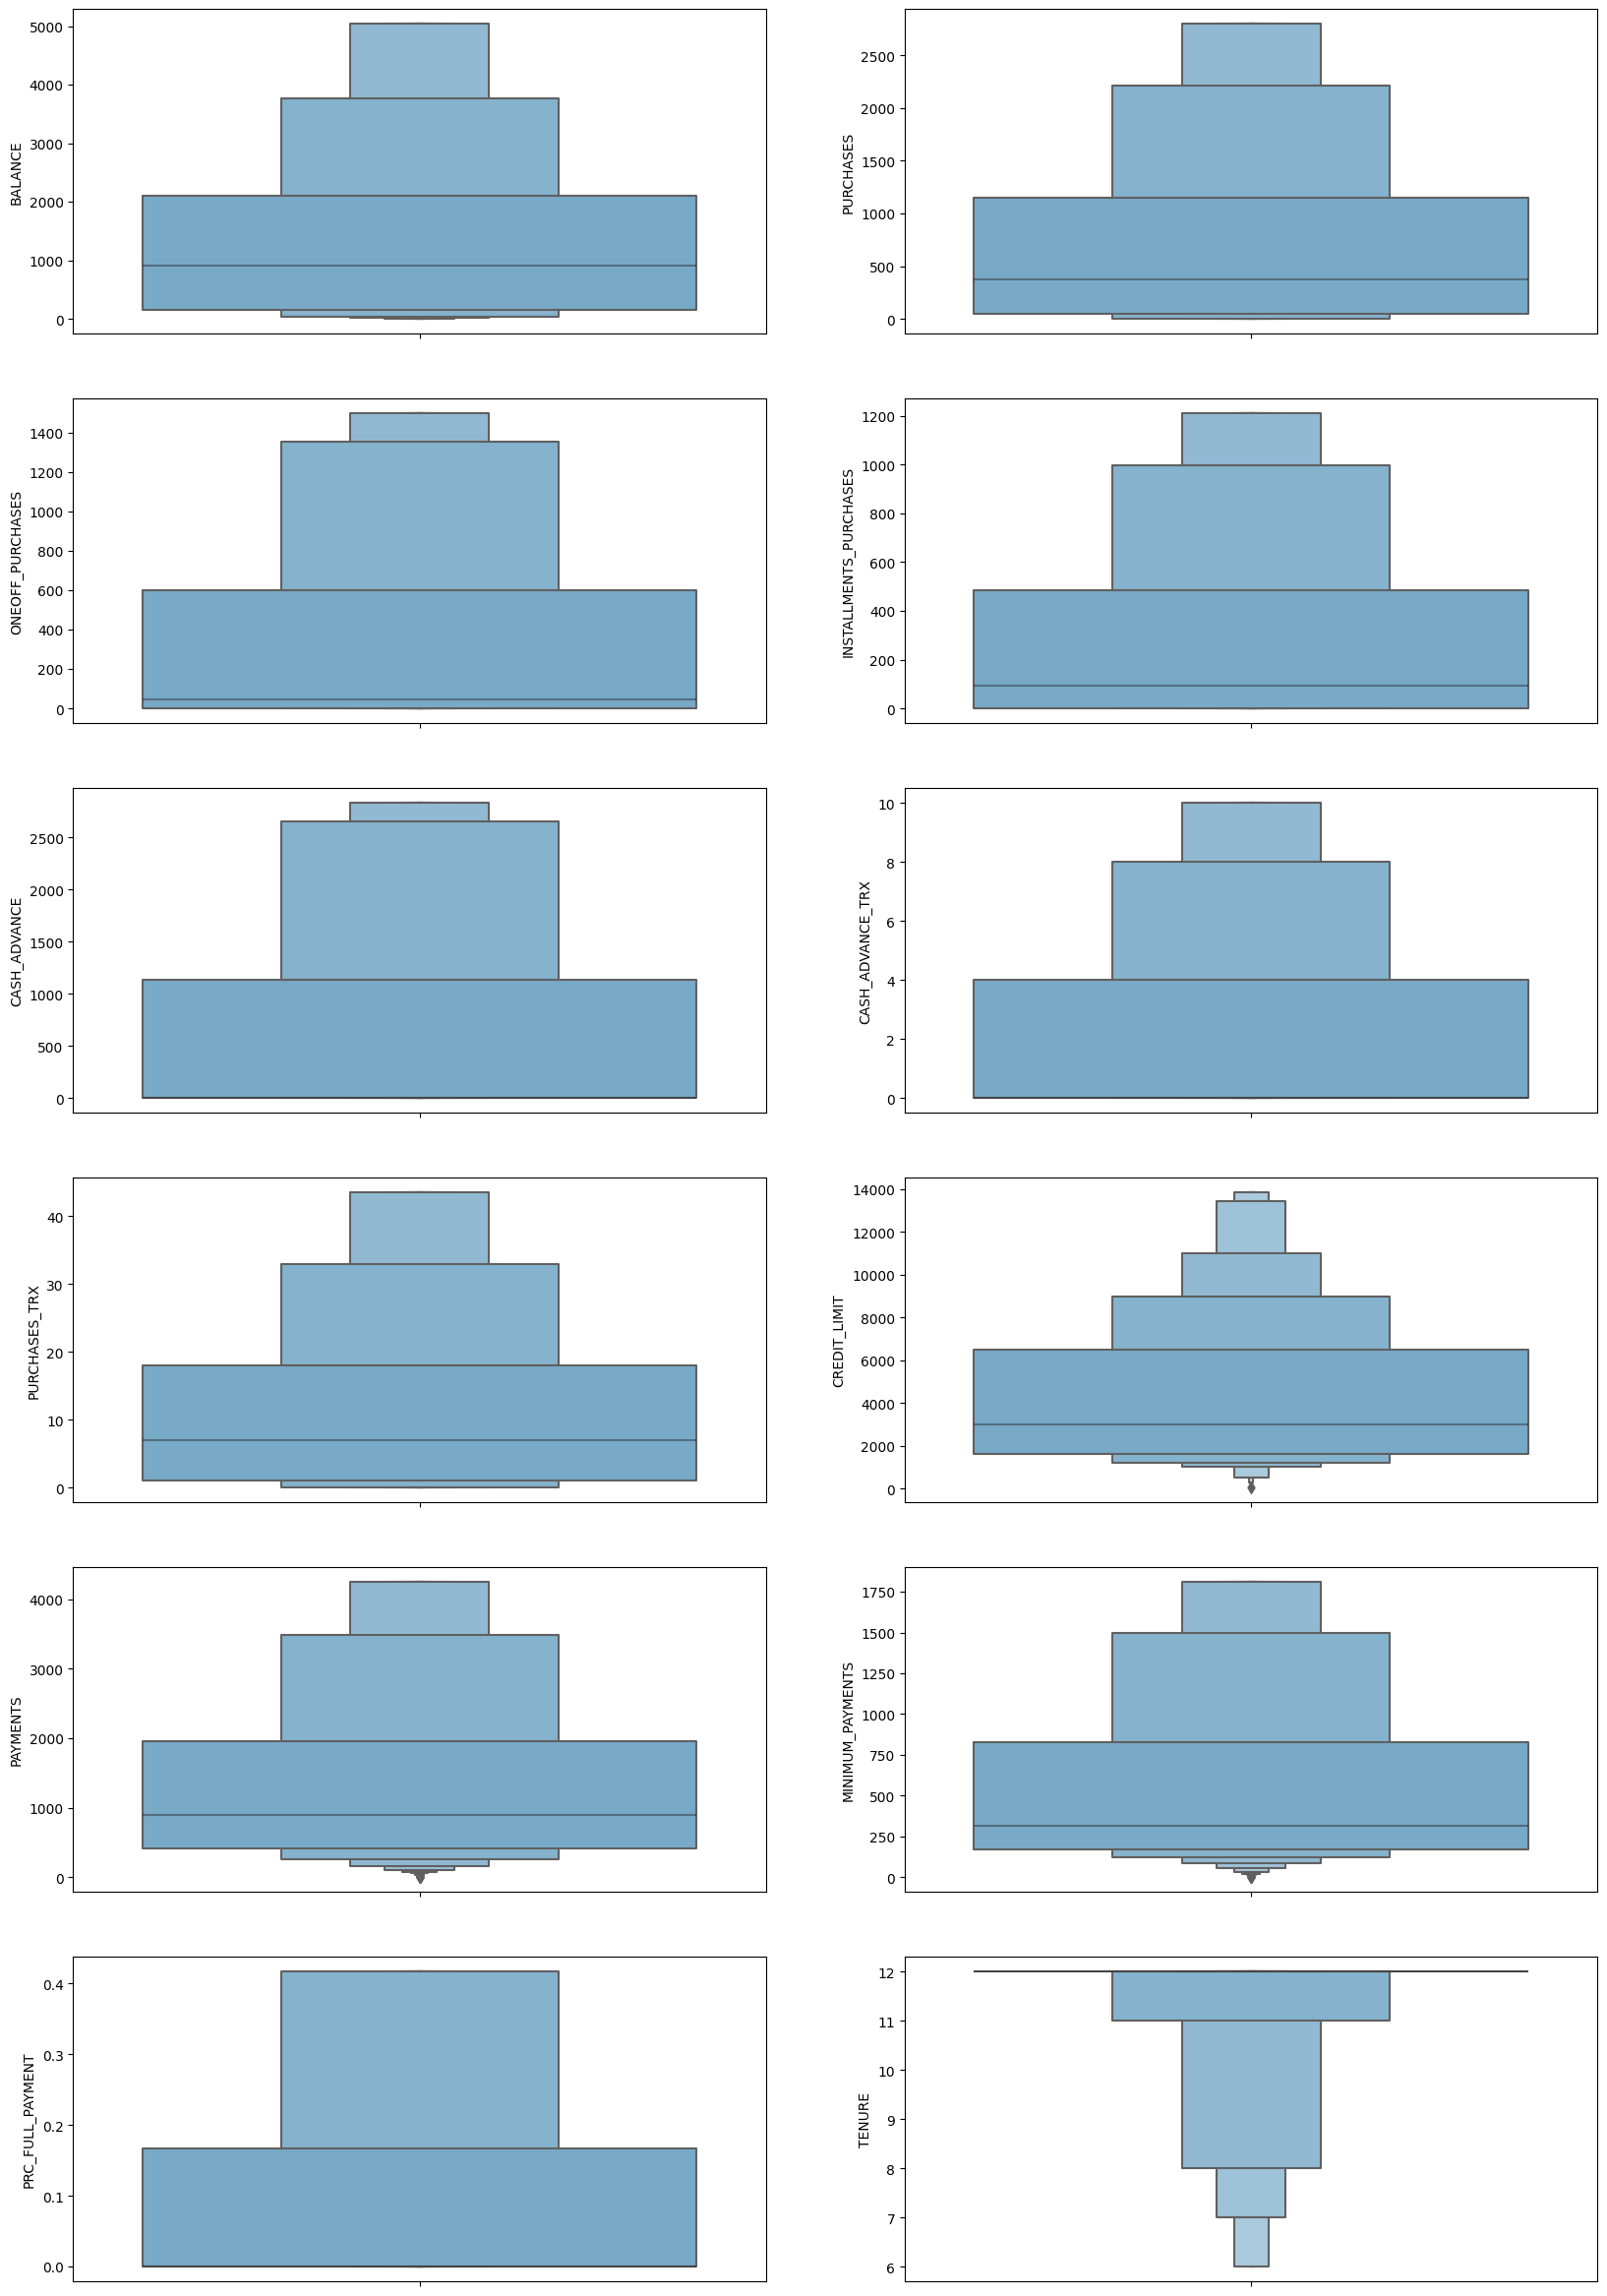

In [39]:
# Check clusters vs numerical columns
fig = plt.figure(figsize=(20, 30))
cols = num_columns
num_rows = 6
num_cols = 2

for index in range(1, num_rows*num_cols+1):
    fig.add_subplot(num_rows, num_cols, index)
    sns.boxenplot(data=new_data_capped, hue= new_data['CLUSTER'], y= cols[index], palette='Blues')
plt.show()

**description** :

**`HOW MANY BALANCE AMOUNT EACH CLUSTER HAVE LEFT IN THEIR ACCOUNT`** :
- CLUSTER **0** > CLUSTER **2** > CLUSTER **1**

**`CREDIT CARD LIMIT OF EACH CLUSTER`** :
- CLUSTER **2** > CLUSTER **0** > CLUSTER **1**

**`AMOUNT OF PAYMENTS DONE BY EACH CLUSTER`**:
- CLUSTER **2** > CLUSTER **0** > CLUSTER **1**

**`MINIMUM AMOUNT OF PAYMENTS MADE BY EACH CLUSTER`** :
- CLUSTER **0** > CLUSTER **2** > CLUSTER **1**

**`PERCENT OF FULL PAYMENT MADE BY EACH CLUSTER`** :
- CLUSTER **0** > CLUSTER **2** > CLUSTER **1**

**`TENURE OF CREDIT CARD SERVICE FOR EACH CLUSTER`** :
- CLUSTER **0** = CLUSTER **1** > CLUSTER **2**

**ringkasan** :

- `Cluster 0` memiliki **saldo** tertinggi, **jumlah pembayaran minimum**, dan **persen pembayaran penuh**

- `Kluster 1` memiliki **saldo**, **batas kredit**, **jumlah pembayaran yang dilakukan**, **jumlah pembayaran minimum**, dan **persen pembayaran penuh** terendah

- `Cluster 2` memiliki **batas kartu kredit** dan **jumlah pembayaran yang dilakukan** tertinggi

## 10. Model Saving

In [40]:
# Save model and other files
with open('scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)

with open('KMeans.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

**penjelasan** :

- save **scaler** for scaling
- save **pca** for dimentionality reduction
- save **km** for clustering
- save **num and cat_columns** for splitting between numerical and categorical column

## 11. Model Inference

In [41]:
# Load model and other files
with open("scaler.pkl", "rb") as file_1:
  scaler = pickle.load(file_1)

with open('pca.pkl', 'rb') as file_2:
  pca = pickle.load(file_2)

with open('KMeans.pkl', 'rb') as file_3:
  model = pickle.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_col = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  list_cat_col = json.load(file_5)

**penjelasan** :

memuat model yang disimpan

In [42]:
# Number of rows
num_rows = 5

# Generate random data
dataFrame = {
    'CUST_ID': np.random.randint(8950, 10000, num_rows),
    'BALANCE': np.random.randint(0, 18495, num_rows),
    'BALANCE_FREQUENCY': np.random.randint(0, 1, num_rows),
    'PURCHASES': np.random.randint(0, 41050, num_rows),
    'ONEOFF_PURCHASES': np.random.randint(0, 41000, num_rows),
    'INSTALLMENTS_PURCHASES': np.random.randint(0, 15000, num_rows),
    'CASH_ADVANCE': np.random.randint(0, 48000, num_rows),
    'PURCHASES_FREQUENCY': np.random.randint(0, 1, num_rows),
    'ONEOFF_PURCHASES_FREQUENCY': np.random.randint(0, 1, num_rows),
    'PURCHASES_INSTALLMENTS_FREQUENCY': np.random.randint(0, 1, num_rows),
    'CASH_ADVANCE_FREQUENCY': np.random.randint(0, 2, num_rows),
    'CASH_ADVANCE_TRX': np.random.randint(0, 123, num_rows),
    'PURCHASES_TRX': np.random.randint(0, 347, num_rows),
    'CREDIT_LIMIT': np.random.randint(50, 30000, num_rows),
    'PAYMENTS': np.random.randint(0, 51000, num_rows),
    'MINIMUM_PAYMENTS': np.random.randint(0, 77000, num_rows),
    'PRC_FULL_PAYMENT': np.random.randint(0, 1, num_rows),
    'TENURE': np.random.randint(6, 12, num_rows),
    # 'CLUSTER': np.random.randint(0, 2, num_rows),
}

# Create DataFrame
random_data = pd.DataFrame(dataFrame)

# Display the first few rows of the DataFrame
random_data.head()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     9179    14731                  0      29937             10433   
1     9111     6238                  0      18414             27106   
2     9328     2091                  0      40693             22951   
3     9840    12573                  0      17608             37592   
4     9291    11815                  0      36483              1012   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    2691         11155                    0   
1                     616         12028                    0   
2                    7169          6159                    0   
3                   11349          7142                    0   
4                   10701         43767                    0   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                           0                                 0   
1                           0                                 0   
2                           0                                 0   
3                           0                                 0   
4                           0                                 0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0               122            190         12460   
1                       1                86            110          9681   
2                       1                32            149          5769   
3                       1                35             72         22037   
4                       1                26            202           413   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     28507             34138                 0      11  
1     10512              2172                 0      10  
2     41200             29466                 0       8  
3     32062             39148                 0       7  
4      8257             42213                 0       6

**penjelasan** :

membuat data acak dan membuat dataframe

In [43]:
# Splitting the dataset into categorical and numerical columns
data_inference_num = random_data[list_num_col]
data_inference_cat = random_data[list_cat_col]

**penjelasan** :

splitting data random untuk scaling

In [44]:
# Data Scaling
data_inference_num_scaled = scaler.transform(data_inference_num)
# Concatenate data
data_inference_final = np.concatenate([data_inference_num_scaled, data_inference_cat], axis=1)
data_inference_final

array([[ 1.81699508,  8.53264699, 32.31777585, 19.07726272,  5.85524774,
        10.32556424, 34.76806171, 13.06834772,  2.35659284, 21.10564101,
        59.89903755, -0.62947992, -0.40764952,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.79072692,  3.08439108, 19.55504141, 50.67287847,  0.76267642,
        11.18655345, 24.30079687,  7.19299139,  1.53945672,  7.09664529,
         2.84974248, -0.62947992, -1.1704797 ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 1.87455326,  0.42409234, 44.23099044, 42.79908351, 16.84538478,
         5.39829954,  8.59989962, 10.0572276 ,  0.3891737 , 30.98706266,
        51.56098128, -0.62947992, -2.69614006,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 2.07233705,  7.1482909 , 18.66232563, 70.54402504, 27.10415495,
         6.36777536,  9.47217169,  4.40219713,  5.17261035, 23.87318643,
        68.84031792, -0.62947992, -3.45897024,  0.   

**penjelasan** :

concate both the scaled random data and the encoded categorical data

In [45]:
# Dimensionality Reduction
data_inference_pca = pca.transform(data_inference_final)

**penjelasan** :

reducing the dimentionality of the random data

In [46]:
# Model Prediction
y_pred_inference = model.predict(data_inference_pca)
y_pred_inference

array([2, 2, 2, 2, 2])

**penjelasan** :

memprediksi cluster mana yang setiap data acaknya ditentukan

## 12. Conclusion

### EDA

**Kesimpulan** :

- Data menunjukkan **banyak outlier** yang dapat mengganggu pengelompokan model, hal ini perlu ditangani dengan membatasi outlier
- Kolom `MINIMUM_PAYMENTS` dan `TENURE` menunjukkan **variasi rendah**, yang berarti outliernya tidak dapat ditangani dengan baik dan dapat berdampak pada algoritma berbasis centroid, seperti algoritma K-Means
- Sebagian besar pengguna `sering` **memperbarui saldo mereka**
- Sebagian besar pengguna `tidak sering` **membeli sekaligus**, **membeli dengan mencicil**, dan **membayar tunai di muka**
- Jumlah pengguna yang **sering membeli** dan jumlah pengguna yang **tidak sering membeli** adalah `serupa`

### Model

**Kesimpulan** :

* Dengan menggunakan algoritma `K-Means`, kami membuat model clustering berdasarkan data kartu kredit 6 bulan terakhir. Model membagi data menjadi `3 Cluster` dengan menggunakan **Elbow Method** untuk menentukan jumlah cluster yang optimal yaitu `3` dan **Silhouette Plot** untuk melihat apakah data masih tumpang tindih di antara keduanya. Dari Silhouette Plot kami mendapatkan skor `0,278` yang menunjukkan bahwa cluster **mungkin tidak terpisah dengan baik**, dan mungkin ada **beberapa tingkat tumpang tindih di antara cluster**

### Cluster

**Kesimpulan** :

- Pengguna `Kluster 0` `lebih konservatif dalam penggunaan kartu kredit` dibandingkan dengan Pengguna Klaster 2. Mereka lebih jarang memperbarui saldo tetapi cenderung lebih sering membayar dengan uang tunai di muka. Mereka memiliki jumlah saldo tertinggi yang tersisa di rekening mereka dan melakukan pembayaran minimum tertinggi, sehingga menyarankan **pendekatan yang lebih hati-hati dalam pengelolaan kartu kredit**.

- `Cluster 1` `berada di antara Cluster 0 dan 2` dalam hal aktivitas kartu kredit. Mereka memperbarui saldo dan melakukan pembelian dengan frekuensi moderat. Mereka memiliki **batas kartu kredit terendah** di antara cluster, melakukan **jumlah pembayaran terendah**, dan memiliki persentase pembayaran penuh yang menengah.

- `Cluster 2` menunjukkan pola `penggunaan kartu kredit paling aktif`. Anggota cluster ini memperbarui saldo mereka, melakukan pembelian, dan menggunakan pembelian satu kali dan paket cicilan lebih sering dibandingkan cluster lainnya. Mereka juga cenderung memiliki jumlah saldo terendah yang tersisa di rekening mereka, yang menunjukkan **pembelanjaan lebih tinggi**.

## Recommendation

### Model 

**Rekomendasi** :

Skor siluet `0,278` relatif **rendah**, menunjukkan bahwa masih ada ruang untuk perbaikan dalam kualitas pengelompokan. Hal ini menunjukkan bahwa cluster-cluster tersebut mungkin tidak terpisah dengan baik, dan mungkin terdapat beberapa tingkat tumpang tindih di antara cluster-cluster tersebut. Untuk meningkatkan kualitas pengelompokan, kita dapat mencoba:
- Penskalaan Fitur:

    Dalam Rekayasa Fitur ini kami menggunakan Scaler Standar, kami dapat menggunakan teknik seperti **Min-Max scaling** untuk menstandarkan fitur, yang mungkin meningkatkan kinerja pengelompokan.
- Pemilihan Fitur atau Pengurangan Dimensi:

    Kurangi dimensi kumpulan data jika memiliki banyak fitur. Dalam model ini kita menggunakan PCA, kita dapat menggunakan teknik lain seperti **t-Distributed Stochastic Neighbor Embedding (t-SNE)** untuk membantu menyimpan informasi penting sekaligus mengurangi noise.
- Coba Algoritma Pengelompokan yang Berbeda:

    Dalam model ini kami menggunakan algoritme K-Means, kami dapat bereksperimen dengan algoritme pengelompokan yang berbeda seperti pengelompokan **DBSCAN**, atau pengelompokan **hierarki**. Algoritme yang berbeda mungkin memiliki kinerja yang lebih baik pada jenis kumpulan data yang berbeda.
- Parameter Algoritma Tune :

    Sesuaikan hyperparameter algoritma pengelompokan. Dalam model clustering K-means ini kita menggunakan 10 jumlah iterasi, kita dapat mencoba jumlah iterasi yang berbeda.
- Evaluasi :

    Selain skor siluet, kami dapat mempertimbangkan untuk menggunakan metrik evaluasi pengelompokan lainnya seperti **Davies-Bouldin index**, **Calinski-Harabasz index**, atau inspeksi visual kualitas kluster untuk memvalidasi hasilnya.

### Business 

**Rekomendasi** :

Dari kesimpulan di atas, kami dapat memberikan beberapa rekomendasi bisnis untuk masing-masing cluster, seperti :
- `Kluster 0` :

Tawarkan kepada mereka **financial management tools** atau sumber daya untuk membantu mereka melacak pengeluaran mereka dengan lebih baik dan mengelola penggunaan kartu kredit mereka secara efektif. Selain itu, **providing rewards or incentives** untuk menjaga saldo tetap rendah dan melakukan pembayaran tepat waktu dapat mendorong perilaku keuangan yang bertanggung jawab.

- `Kluster 1` :

Tawarkan kepada mereka **credit-building opportunities**, seperti meningkatkan batas kredit mereka secara bertahap seiring mereka menunjukkan penggunaan kartu kredit yang bertanggung jawab. Selain itu, **menyediakan sumber daya edukasi mengenai penganggaran dan perencanaan keuangan** juga dapat membantu mereka mengambil keputusan yang lebih tepat mengenai penggunaan kartu kredit mereka.

- `Kluster 2` :

Tawarkan kepada mereka **tailored rewards programs** atau insentif yang selaras dengan kebiasaan belanja mereka. Misalnya, menawarkan hadiah uang kembali atau diskon untuk pembelian yang sering dilakukan. Selain itu, **menyediakan alat untuk menganggarkan dan mengelola utang kartu kredit** dapat membantu mereka mempertahankan kendali atas keuangan dan menghindari pengeluaran berlebihan.

## Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
    - **Inertia** : Inertia digunakan untuk mengukur seberapa baik K-Means melakukan klustering pada dataset. nilai inertia dan kluster yang rendah menunjukkan bahwa model itu dibuat dengan baik. 
    - **Cara menghitung Inertia** : Mengukur jarak antar setiap data point dan centroid nya, mengkuadratkan jaraknya dan menambahkan hasil kuadrat dalam satu kluster / WCSS (Within-Cluster Sum of Square).

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
    - **Alasan penggunaan** : Digunakan untuk menentukan jumlah kluster yang optimal dalam sebuah dataset.
    - **Cara penggunaan** : 
        1. Mulailah dengan memilih sejumlah k yang mungkin sebagai jumlah klaster.
        2. Hitung inertia (misalnya, dengan menggunakan metode K-Means) untuk setiap nilai k tersebut.
        3. Plot grafik nilai inertia terhadap jumlah klaster.
        4. Identifikasi titik di mana penurunan inertia mulai melambat secara signifikan. Titik ini adalah titik siku pada grafik.
        5. Jumlah klaster di titik siku tersebut adalah jumlah klaster optimal yang dapat dipilih.
    - **Kelemahan** : 
        - Terkadang tidak jelas di mana titik siku sebenarnya berada pada grafik, terutama jika pola tidak terlalu jelas.
        - Tidak selalu memberikan hasil yang optimal terutama untuk data yang kompleks atau tidak simetris. Dalam kasus-kasus tersebut, mungkin diperlukan metode evaluasi lainnya.
    - **Kelebihan** :
        - Sederhana dan mudah dipahami.
        - Memberikan petunjuk yang baik dalam menentukan jumlah klaster tanpa harus mengandalkan asumsi tertentu tentang data.